In [1]:
from surgeon_recording.reader import Reader
from glob import glob
from os.path import join
import os
import numpy as np
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from copy import deepcopy
import pandas as pd

import cv2
import csv
from natsort import natsorted
from surgeon_recording.synchronization import Synchro

from moviepy.editor import *

from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
import moviepy.video.io.ImageSequenceClip

import shutil




In [2]:
synchro = Synchro()

# Manual entries

In [34]:
#recording_session = 'SFITS_28_03_22'
#subject = 'MAXIME'
#fps_gopro = 59.940
#fps_rs = 30
#fps_micro = 30
#sensors = []

recording_session = '90622'
subject = '7/1'
fps_gopro = 59.940   #test at LASA: gopro = oneplus, 30fps ATTENTION pour conversion besoin de set la resolution (mais de toute facon on utilisera pas ET fait pas des segments donc ok)
fps_rs = 30
fps_micro = 30       #REAL MICRO, 250522 aussi
#fps_micro = 59.940       #test at LASA: microscope + gopro, 59.940
sensors = ['optitrack', 'emg', 'TPS_calibrated']


path_to_data_folder = '/home/anaelle/git/surgeon_recording/data_exp'                 #lasa computer
#path_to_data_folder = '/Users/anael/Documents/GitHub/surgeon_recordings/data'   #windows computer



#synchro mouvement frames --> REPLACE BY READ FROM CSV FILE
#rs_frame = 694
#micro_frame = 384
#gopro_frame = 1217

#rs_abs_time = 1648459085159.2    #REMPLACER AVEC LES INFOS DES PNG
#rs_nb_frame = 66934

cameras = ['GOPRO', 'GOPRO2', 'GOPRO3', 'MICROSCOPE', 'REALSENSE']
folder = ['complete','segments']

folder_creation_all = ['CSV', 'SEGMENTATION', 'complete', 'segments']
folder_creation_rs = ['PNG', 'BAG']
folder_creation_global = ['ALL_VIEWS']

for camera in cameras:
    for folder1 in folder_creation_all:
        if not os.path.exists(join(path_to_data_folder, recording_session , subject, camera , folder1)):
            os.makedirs(join(path_to_data_folder, recording_session , subject,  camera, folder1))
            
    if not os.path.exists(join(path_to_data_folder, recording_session , subject, camera , 'CSV', 'complete')):
        os.makedirs(join(path_to_data_folder, recording_session , subject,  camera, 'CSV', 'complete'))
        
    if not os.path.exists(join(path_to_data_folder, recording_session , subject, camera , 'CSV', 'segments')):
        os.makedirs(join(path_to_data_folder, recording_session , subject,  camera, 'CSV', 'segments'))
        
    
    if camera == 'REALSENSE':
        for folder2 in folder_creation_rs:
            if not os.path.exists(join(path_to_data_folder, recording_session , subject, camera , folder2)):
                os.makedirs(join(path_to_data_folder, recording_session , subject,  camera, folder2))
        
    
if not os.path.exists(join(path_to_data_folder, recording_session , subject, 'ALL_VIEWS')):
    os.makedirs(join(path_to_data_folder, recording_session , subject, 'ALL_VIEWS'))
    
            
if not os.path.exists(join(path_to_data_folder, recording_session , subject, 'SENSORS')):
            os.makedirs(join(path_to_data_folder, recording_session , subject, 'SENSORS'))
        
if not os.path.exists(join(path_to_data_folder, recording_session , subject, 'SENSORS', 'SEGMENTATION')):
            os.makedirs(join(path_to_data_folder, recording_session , subject, 'SENSORS', 'SEGMENTATION'))

if not os.path.exists(join(path_to_data_folder, recording_session , subject, 'SEGMENTATION_CSV')):
            os.makedirs(join(path_to_data_folder, recording_session , subject, 'SEGMENTATION_CSV'))
        
fps = {
    "GOPRO": fps_gopro,
    "GOPRO2": fps_gopro,
    "GOPRO3": fps_gopro,
    "MICROSCOPE": fps_micro,
    "REALSENSE": fps_rs
}

data_folder = join('..', 'data_exp', recording_session , subject)

# PART 1: synchro + video conversion

In [35]:
subjects = ['7/1']

## Convert video

### get segments into one video (gopro, microscope)


In [36]:
# convert microscope and gopro mp4 video
#cameras = ['GOPRO']
for subject in subjects:
    data_folder = join('..', 'data_exp', recording_session , subject)
    
    for camera in cameras:
        L =[]
        if camera != 'REALSENSE':
        
            for root, dirs, files in os.walk(join(data_folder, camera, 'segments')):
                files = natsorted(files)
                print(files)
                #if len(files) > 1:
                for file in files:
                    if os.path.splitext(file)[1] == '.mp4' or os.path.splitext(file)[1] == '.MP4':
                        filePath = os.path.join(root, file)
                        video = VideoFileClip(filePath)
                        #video = VideoFileClip(filePath, target_resolution=(1920, 1080))              # need to set manually resolution for oneplus videos
                        L.append(video)
                tmp = 'output' + camera + '.mp4'
                output_path = join(data_folder, camera, 'complete', tmp)
                final_clip = concatenate_videoclips(L)
                final_clip.write_videofile(output_path, fps=fps[camera], remove_temp=True, audio = False)
                #else : #si slmt un segment: peut copier simplement
                    #filePath = os.path.join(root, files[0])
                    #tmp = 'output' + camera + '.mp4'
                    #output_path = join(data_folder, camera, 'complete', tmp)
                    #shutil.copyfile(filePath, output_path)



['GOPR5912.MP4']
Moviepy - Building video ../data_exp/90622/7/1/GOPRO/complete/outputGOPRO.mp4.
Moviepy - Writing video ../data_exp/90622/7/1/GOPRO/complete/outputGOPRO.mp4



Moviepy - Done !
Moviepy - video ready ../data_exp/90622/7/1/GOPRO/complete/outputGOPRO.mp4
['GH013777.MP4']
Moviepy - Building video ../data_exp/90622/7/1/GOPRO2/complete/outputGOPRO2.mp4.
Moviepy - Writing video ../data_exp/90622/7/1/GOPRO2/complete/outputGOPRO2.mp4



Moviepy - Done !
Moviepy - video ready ../data_exp/90622/7/1/GOPRO2/complete/outputGOPRO2.mp4
['GH010947.MP4']
Moviepy - Building video ../data_exp/90622/7/1/GOPRO3/complete/outputGOPRO3.mp4.
Moviepy - Writing video ../data_exp/90622/7/1/GOPRO3/complete/outputGOPRO3.mp4



Moviepy - Done !
Moviepy - video ready ../data_exp/90622/7/1/GOPRO3/complete/outputGOPRO3.mp4
['videoHD1080_2022-06-09_11-57-18.mp4']
Moviepy - Building video ../data_exp/90622/7/1/MICROSCOPE/complete/outputMICROSCOPE.mp4.
Moviepy - Writing video ../data_exp/90622/7/1/MICROSCOPE/complete/outputMICROSCOPE.mp4



Moviepy - Done !
Moviepy - video ready ../data_exp/90622/7/1/MICROSCOPE/complete/outputMICROSCOPE.mp4


### bag to png to mp4

In [37]:
# extract the png with the converter (from shell) to the folder PNG in the folder REALSENSE in the SUBJECT folder
for subject in subjects:
    data_folder = join('..', 'data_exp', recording_session , subject)
    camera = 'REALSENSE'

    bag_file = [x[2] for x in os.walk(join(data_folder, camera, 'BAG'))]
    print(bag_file[0][0])

    path_bag_file = join(path_to_data_folder, recording_session , subject, camera, 'BAG', bag_file[0][0])
    print(path_bag_file)



    path_png=  join(path_to_data_folder, recording_session , subject,  camera, 'PNG', 'a')
    print(path_png)
    os.system('rs-convert -i ' + path_bag_file + ' -p ' + path_png)
    
    image_folder=join(data_folder, camera, 'PNG')
    image_files = [os.path.join(image_folder,img) for img in os.listdir(image_folder) if img.endswith(".png")]

    clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(natsorted(image_files), fps=fps[camera])
    path_mp4 = join(data_folder, camera, 'complete', 'rs_converted.mp4')
    print('mp4 file: ' + path_mp4)
    clip.write_videofile(path_mp4)

20220609_120025.bag
/home/anaelle/git/surgeon_recording/data_exp/90622/7/1/REALSENSE/BAG/20220609_120025.bag
/home/anaelle/git/surgeon_recording/data_exp/90622/7/1/REALSENSE/PNG/a
100%
PNG converter
	610 Color frame(s) processed

mp4 file: ../data_exp/90622/7/1/REALSENSE/complete/rs_converted.mp4
Moviepy - Building video ../data_exp/90622/7/1/REALSENSE/complete/rs_converted.mp4.
Moviepy - Writing video ../data_exp/90622/7/1/REALSENSE/complete/rs_converted.mp4



Moviepy - Done !
Moviepy - video ready ../data_exp/90622/7/1/REALSENSE/complete/rs_converted.mp4


In [ ]:
#image_folder=join(data_folder, camera, 'PNG')
#image_files = [os.path.join(image_folder,img) for img in os.listdir(image_folder) if img.endswith(".png")]

#clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(natsorted(image_files), fps=fps[camera])
#path_mp4 = join(data_folder, camera, 'complete', 'rs_converted.mp4')
#print('mp4 file: ' + path_mp4)
#clip.write_videofile(path_mp4)

## Get absolute time from png names


In [19]:
# read synchro frames from csv


file = 'synchro_frame.csv'
directory = join(data_folder, file)

data = pd.read_csv(directory)
rs_frame = int(data['rs_frame'])
micro_frame = int(data['micro_frame'])
gopro_frame = int(data['gopro_frame'])
gopro2_frame = int(data['gopro2_frame'])
gopro3_frame = int(data['gopro3_frame'])




frame = {
    "REALSENSE": rs_frame,
    "GOPRO": gopro_frame,
    "GOPRO2": gopro2_frame,
    "GOPRO3": gopro3_frame,
    "MICROSCOPE": micro_frame,
    
}


In [20]:
# file directory to access the png files (Attention: also in the function to get video from png)
camera = 'REALSENSE'
image_folder=join(data_folder, camera, 'PNG')
image_files = [os.path.join(image_folder,img) for img in os.listdir(image_folder) if img.endswith(".png")]

# get nb of frames of the rs camera
rs_nb_frame = len(image_files)

# get absolute time vector of rs from png files
abs_time_vector = {}
abs_time_vector[camera] = [name[-32:-4] for name in natsorted(image_files)]

rs_abs_time = float(abs_time_vector['REALSENSE'][rs_frame]) #abs time vector from png names

# PART 2 : Write CSV files

## Get nb of frames

In [ ]:
# get the nub of frames for each segments and the total videos for the gopro and microscope

nb_frames = {}
sum_frame = {}


for k in range(len(cameras)):    #for the different cameras
    camera = cameras[k]
    sum_frame[camera] = {}
    for j in range(len(folder)):  #segments and complete
        files = [x[2] for x in os.walk(join(data_folder, camera,folder[j]))]   #get the name of the files of the video
        tmp = 0
        if camera == 'REALSENSE':
                    nb_frames[camera] = rs_nb_frame
        else:
            if len(files) != 0:                                                    
                for i in range(len(files[0])):                                   
                    file = files[0][i]                                             # prend la valeur des differents fichiers a la suite (les videos)
                
                    if os.path.splitext(file)[1] == '.MP4' or os.path.splitext(file)[1] == '.mp4':   #check si bien une video
                    #print(join(data_folder, folder[j], file))
                        cap = cv2.VideoCapture(join(data_folder, camera, folder[j], file))
                        nb_frames[file] = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))                     # store nb of frames with file name as key
                
                        if folder[j] == 'segments':                                # si on est dans le fichiers des segments on calcule la somme de tous les segments
                            tmp = tmp + nb_frames[file]
                            sum_frame[camera] = tmp
                
                #print(file, '  nb of frames:   ', nb_frames[file] )
    print('Total nb of frames of segments for ', camera, sum_frame[camera])   
print('Nb of frames of the output GOPRO video:   ' , nb_frames['outputGOPRO.mp4'])
print('Nb of frames of the output MICROSCOPE video:   ', nb_frames['outputMICROSCOPE.mp4'])
print('Nb of frames of the output RS video:   ', nb_frames['REALSENSE'])  
#print(nb_frames) #ok le nb of frame obtenu pour les segments coresp. a celui donne par Resolve
  

## write CSV with absolute time for RS coming from PNG, and absolute time starting on the frame of the mvmt for the other, based on the abs time of RS

### method 1 

In [ ]:
csv_names = []

for k in range(len(cameras)):
    camera = cameras[k]
    
    for j in range(len(folder)):
        files = [x[2] for x in os.walk(join(data_folder, camera ,folder[j]))]
        print(files)  
        
        if camera == 'REALSENSE':
            
            rs_csv = join(data_folder,camera, 'CSV', 'complete', 'REALSENSE_abs_time.csv')
            f = open(rs_csv, 'w') # open the file in the write mode                        #open last one
    
            # create the csv writer
            writer = csv.writer(f)
            header = ['index','frequency','relative_time','abs_time']
            # write a row to the csv file
            writer.writerow(header)
            rel_time = 0
            #abs_time = rs_abs_time                                        #put the ref_abs time we got from RS as the first absolute time to write
            
            for m in range((nb_frames[camera])):                            #pour toutes les frames
                abs_time = abs_time_vector['REALSENSE'][m]
                        #if m >= frame[camera]:        # si on est dans les videos completes et que l-indice est plus grand que la frame avec le mvmt de ref
                row = [m,fps[camera],rel_time,float(abs_time)]               # alors on inscrit le abs time, et a partir de la on l'incremente de la fps (en ms)
                            #abs_time = abs_time + 1/fps[camera]*1000
                        #else:
                            #row = [m, fps[camera], rel_time]                      # sinon on est soit dans les segments (pas besoin absolute time), soit on est avant le mvmt de ref donc pas de abs time
                    
                writer.writerow(row)
                rel_time = rel_time + 1/fps[camera]                       # on incremente le rel time par la fps corespondante 
                            
            print(float(abs_time)-1/fps[camera]*1000)
            f.close()        
            
        else:
            for i in range(len(files[0])):
                file = files[0][i] 
                if os.path.splitext(file)[1] == '.mp4' or os.path.splitext(file)[1] == '.MP4':
            
                    csv_names.append(join(data_folder,camera, 'CSV',folder[j], str(file)[0:-4] + '_abs_time.csv'))  #create the csv references
                    f = open(csv_names[-1], 'w') # open the file in the write mode                        #open last one
    
    
                    # create the csv writer
                    writer = csv.writer(f)
                    header = ['index','frequency','relative_time','abs_time']
    
                    # write a row to the csv file
                    writer.writerow(header)
                    rel_time = 0
                    abs_time = rs_abs_time                                        #put the ref_abs time we got from RS as the first absolute time to write
                    #print(file)
                    
                    for m in range((nb_frames[file])):                            #pour toutes les frames
                        if folder[j] == 'complete' and m >= frame[camera]:        # si on est dans les videos completes et que l-indice est plus grand que la frame avec le mvmt de ref
                            row = [m,fps[camera],rel_time,abs_time]               # alors on inscrit le abs time, et a partir de la on l'incremente de la fps (en ms)
                            abs_time = abs_time + 1/fps[camera]*1000
                        else:
                            row = [m, fps[camera], rel_time]                      # sinon on est soit dans les segments (pas besoin absolute time), soit on est avant le mvmt de ref donc pas de abs time
                    
                        writer.writerow(row)
                        rel_time = rel_time + 1/fps[camera]                       # on incremente le rel time par la fps corespondante 
                            
           
                    f.close()

### method 2 test to get relaive time of RS from absolute time 

# PART 3 : Segmentation

## read csv data created to store them

In [ ]:
#reprend les donnes de csv , on peut en profiter pour les cut
index = {}
relative_time = {}
absolute_time = {}

for k in range(len(cameras)):
    camera = cameras[k]
    file = [x[2] for x in os.walk(join(data_folder, camera , 'CSV', 'complete'))]
    print(file[0][0])  
    
    directory = join(data_folder, camera , 'CSV', 'complete', file[0][0])
    print(directory)
    synchro.play(directory, camera)
    index[camera] = synchro.data[camera]['index']
    relative_time[camera] = synchro.data[camera]['relative_time']
    absolute_time[camera] = synchro.data[camera]['abs_time']
    #print(absolute_time[camera])
#print(relative_time)

In [ ]:
#get sensor data from CSV
# NEW RECORDER: take one abs time ref, build new abs time vect based on relative time (frequency)

index_sensor = {}
relative_time_sensor = {}
absolute_time_sensor = {}
headers = {}
directory_sensor = {}
directory_sensor_new = {}

ref_abs_time_sensor = {}
new_abs_time_sensor = {}
new_abs_time_sensor_2 = {}
data_optitrack = {}
data_tps = {}


file = [x[2] for x in os.walk(join(data_folder, 'SENSORS'))]
#print(file[0])  

for sensor in sensors:
    file = sensor + '.csv'
    
    print(file)
    
    directory_sensor[sensor] = join(data_folder, 'SENSORS', file)
    if os.path.exists(directory_sensor[sensor]):
        
        

        
        if sensor == "emg": #EMG rien de nv car on prend abs depuis python et rel time depuis le abs time, comme avant
            synchro.play(directory_sensor[sensor], sensor)
            index_sensor[sensor] = synchro.data[sensor]['index_global']
            relative_time_sensor[sensor] = synchro.data[sensor]['relative_time']
            absolute_time_sensor[sensor] = synchro.data[sensor]['absolute_time']
            
            f = open(directory_sensor[sensor])
            d_reader = csv.DictReader(f)
            #get fieldnames from DictReader object and store in list
            headers[sensor] = d_reader.fieldnames
            print(headers[sensor])
            new_abs_time_sensor[sensor] = absolute_time_sensor[sensor]
            new_abs_time_sensor_2[sensor] = absolute_time_sensor[sensor]
            
            directory_sensor_new [ sensor] = join(data_folder, 'SENSORS', sensor + '.csv')
            

        
        if sensor == "optitrack":
            new_abs_time_sensor[sensor] = []
            
            f = open(directory_sensor[sensor])
            d_reader = csv.DictReader(f)
            #get fieldnames from DictReader object and store in list
            headers[sensor] = d_reader.fieldnames
            print(headers[sensor])
            
            tools = headers[sensor][3:]
            
            synchro.play(directory_sensor[sensor], sensor)
            index_sensor[sensor] = synchro.data[sensor]['index']
            relative_time_sensor[sensor] = synchro.data[sensor]['relative_time']
            absolute_time_sensor[sensor] = synchro.data[sensor]['absolute_time']
            for tool in tools:
                data_optitrack[tool] = synchro.data[sensor][tool]
            
            opti_csv_new = join(data_folder, 'SENSORS', sensor + '_new_abs_time.csv')
            f = open(opti_csv_new, 'w') # open the file in the write mode                        
    
            # create the csv writer
            writer = csv.writer(f)
            header = headers[sensor]
            header.append("absolute_time_new")
            # write a row to the csv file
            writer.writerow(header)
            T = True
            i = 0
            # prendre le absolute time de 2 ligne apres que le relative time soit vers 0 ou inferieur a 0 (car 1eres lignes nulles dans csv)
            while T is True: # cherche la premi[re valeur, ensuite sort

                if relative_time_sensor[sensor][i] > 10:
                    ref_abs_time_sensor[sensor] = absolute_time_sensor[sensor][i]
                    T = False
                    
                i = i + 1

                
            
            for j in range(len(relative_time_sensor[sensor])-1):
                if j < i:
                    new_abs_time_sensor[sensor].append(ref_abs_time_sensor[sensor])
                else:
                    #diff = (relative_time_sensor[sensor][j+1] - relative_time_sensor[sensor][j])
                    diff = (relative_time_sensor[sensor][j] - relative_time_sensor[sensor][j-1])
                    new_abs_time_sensor[sensor].append(new_abs_time_sensor[sensor][j-1] + diff)
                row = [index_sensor[sensor][j], relative_time_sensor[sensor][j], absolute_time_sensor[sensor][j]]
                for tool in tools:
                    row.append(data_optitrack[tool][j])
                row.append( new_abs_time_sensor[sensor][j])
                writer.writerow(row)
        
            f.close()
            file_new = sensor + '_new_abs_time.csv'
            #a = pd.read_csv(join(data_folder, 'SENSORS', file_new))
            new_abs_time_sensor_2[sensor] = pd.read_csv(join(data_folder, 'SENSORS', file_new))['absolute_time_new']
            
            directory_sensor_new [ sensor] = join(data_folder, 'SENSORS', sensor + '_new_abs_time.csv')
            
            
               
        if sensor == "TPS_calibrated":
            new_abs_time_sensor[sensor] = []

            f = open(directory_sensor[sensor])
            d_reader = csv.DictReader(f)
            #get fieldnames from DictReader object and store in list
            headers[sensor] = d_reader.fieldnames
            print(headers[sensor])
            
            elements = headers[sensor][3:]
            
            data = pd.read_csv(directory_sensor[sensor])
            
            #synchro.play(directory_sensor[sensor], sensor)
            #index_sensor[sensor] = synchro.data[sensor]['index']
            abs_time_writing = data['abs_time_writing']
            relative_time_sensor[sensor] = data[' relative_time']
            absolute_time_sensor[sensor] = data[' absolute_time']
            for element in elements:
                data_tps[element] = data[element]
            
            tps_csv_new = join(data_folder, 'SENSORS', sensor + '_new_abs_time.csv')
            f = open(tps_csv_new, 'w') # open the file in the write mode                        
    
            # create the csv writer
            writer = csv.writer(f)
            header = headers[sensor] 
            header.append("absolute_time_new")
            # write a row to the csv file
            writer.writerow(header)
            
            ref_abs_time_sensor[sensor] = absolute_time_sensor[sensor][0]

            for j in range(len(relative_time_sensor[sensor])-1):
                if j == 0:
                    new_abs_time_sensor[sensor].append(ref_abs_time_sensor[sensor])
                else:
                    #diff = (relative_time_sensor[sensor][j+1] - relative_time_sensor[sensor][j])
                    diff = (relative_time_sensor[sensor][j] - relative_time_sensor[sensor][j-1])
                    new_abs_time_sensor[sensor].append(new_abs_time_sensor[sensor][j-1] + diff )
                row = [abs_time_writing [j], relative_time_sensor[sensor][j], absolute_time_sensor[sensor][j]]
                for element in elements:
                    row.append(data_tps[element][j])
                
                row.append(new_abs_time_sensor[sensor][j])
                writer.writerow(row)
                
        
            f.close()
            directory_sensor_new [ sensor] = join(data_folder, 'SENSORS', sensor + '_new_abs_time.csv')

        
            file_new = sensor + '_new_abs_time.csv'
            #data = pd.read_csv(join(data_folder, 'SENSORS', file_new))
            new_abs_time_sensor_2[sensor] = (pd.read_csv(join(data_folder, 'SENSORS', file_new))['absolute_time_new'])/1000
            absolute_time_sensor[sensor] = absolute_time_sensor[sensor]/1000

print(absolute_time_sensor)
                
            

## get closest no of frame and rel time to the ref no frame (on microscope) using absolute time, and export coresp videos (read microscope frame from csv)

# ALL VIEWS FROM MICROSCOPE

In [ ]:
camera_ref = "MICROSCOPE"
cameras_2 = ['GOPRO', 'GOPRO2', 'MICROSCOPE', 'GOPRO3']


#get ref fram of microscope directly from csv file
#file = [x[2] for x in os.walk(join(data_folder, 'SEGMENTATION_CSV'))]
#print(file[0][0])  

directory = join(data_folder, 'SEGMENTATION_CSV', 'segmentation_micro_frames.csv')
#directory = join(data_folder ,'SEGMENTATION_CSV', file[0][0])
print(directory)
DATA = pd.read_csv(directory)
start_ref_frame_vector = DATA['start_frame']
stop_ref_frame_vector = DATA['stop_frame']
index_segment_vector = DATA['nb']

    
for o in range(len(start_ref_frame_vector)):
    start_ref_frame = start_ref_frame_vector[o]
    print(start_ref_frame)
    stop_ref_frame = stop_ref_frame_vector[o]

    #camera = camera_ref
    start_ref_abs_time = absolute_time[camera_ref][start_ref_frame]
    stop_ref_abs_time = absolute_time[camera_ref][stop_ref_frame]
    #
    pos_start = {}
    pos_stop = {}
    rel_time_start = {}
    rel_time_stop = {}
    abs_time_start = {}
    abs_time_stop = {}
    duration_clip = {}
    clip = {}
    
    pos_start_sensor = {}
    pos_stop_sensor = {}
    abs_time_start_sensor = {}
    abs_time_stop_sensor = {}

    #for camera in cameras:
    print("start reference abs time:  ", start_ref_abs_time)  
    print("stop reference abs time:  ", stop_ref_abs_time) 
    print("----------------------")
    for camera in cameras_2:
        pos_start[camera] = []
        pos_stop[camera] = []
        rel_time_start[camera] = {}
        rel_time_stop[camera] = {}
        abs_time_start[camera] = {}
        abs_time_stop[camera] = {}
        duration_clip[camera] = {}
        if not camera in camera_ref:
            #print(absolute_time[camera])
            [pos_start[camera], abs_time_start[camera]]= synchro.take_closest(absolute_time[camera], start_ref_abs_time, frame[camera], sensor)
            print(camera, "start index:       ", pos_start[camera], "abs time:   ", abs_time_start[camera])
            [pos_stop[camera], abs_time_stop[camera]] = synchro.take_closest(absolute_time[camera], stop_ref_abs_time, frame[camera], sensor)
            print(camera, "stop index:        ", pos_stop[camera], "abs time:   ", abs_time_stop[camera])
            rel_time_start[camera] = relative_time[camera][pos_start[camera]]
            rel_time_stop[camera] = relative_time[camera][pos_stop[camera]]
            print(camera, "start index:       ", pos_start[camera], "rel time:   ", rel_time_start[camera])
            print(camera, "stop index:       ", pos_stop[camera], "rel time:   ", rel_time_stop[camera])
            print("----------------------")
        else:
            rel_time_start[camera] = relative_time[camera][start_ref_frame]
            rel_time_stop[camera]  = relative_time[camera][stop_ref_frame]
            #abs_time_start[camera] = absolute_time[camera][start_ref_frame]
            abs_time_start[camera] = start_ref_abs_time
            #abs_time_stop[camera]  = absolute_time[camera][stop_ref_frame]
            abs_time_stop[camera] = stop_ref_abs_time
            print(camera, "start index   ", start_ref_frame, "rel time:   ", rel_time_start[camera])
            print(camera, "stop index   ", stop_ref_frame, "rel time:   ", rel_time_stop[camera])
            print("----------------------")
            pos_start[camera] = start_ref_frame
            pos_stop[camera] = stop_ref_frame
            
        #export video from t1 to t2 in seconds

     
        #for camera in cameras:
        t1 = rel_time_start[camera]
        t2 = rel_time_stop[camera]
    
        #name with abs time ref
        #r1 = abs_time_start[camera]
        #r2 = abs_time_stop[camera]
        #ref = str(r1)[1:7] + "_to_" + str(r2)[1:7] + ".mp4"
    
        #name with no of frame
        r1 = pos_start[camera]
        r2 = pos_stop[camera]
        ref = str(r1) + "_to_" + str(r2) + ".mp4"

        #name with rel time
        #ref = str(t1)[1:7] + "_to_" + str(t2)[1:7] + ".mp4"
    
        #name with rsegment nb
        r1 = index_segment_vector[o]
        ref = "segment_nb_" + str(r1) + ".mp4"
        
        file = [x[2] for x in os.walk(join(data_folder, camera , 'complete'))]
        print(file[0][0])  
        target_name = join(path_to_data_folder, recording_session, subject, camera , 'SEGMENTATION', ref)
        file_name = join(data_folder, camera, 'complete', file[0][0])
        print(target_name)
        if not os.path.exists(target_name):
            ffmpeg_extract_subclip(file_name, t1, t2, targetname=target_name)
        
        clip[camera] = VideoFileClip(target_name)
        duration_clip[camera] = t2 - t1
            
    ref2 = "segment_nb_" + str(r1) + "_all_views.mp4"
    
    output_name = join(path_to_data_folder, recording_session, subject, 'ALL_VIEWS', ref2)
    if not os.path.exists(output_name):
        
        smallest_duration = min(duration_clip.values())


        output_blank = join(path_to_data_folder, recording_session, subject, 'blank_video.mp4')

        size = (200, 100)
        duration = (smallest_duration)
        print(duration)
        if not os.path.exists(output_blank):
            synchro.color_clip(size, duration, output_blank)
        clip4 = VideoFileClip(output_blank)

        # clips list
        #clips = [[clip['MICROSCOPE'], clip['REALSENSE'].resize(1.4)],
                 #[clip['GOPRO2'], clip['GOPRO']]]

        # clips list wo RS
        #clips = [[clip['MICROSCOPE'], clip4],
                 #[clip['GOPRO2'], clip['GOPRO']]]
        clips = [[clip['MICROSCOPE'], clip['GOPRO3']],
                 [clip['GOPRO2'], clip['GOPRO']]]
        
        # stacking clips
        final = clips_array(clips, rows_widths=[1000, 1000], cols_widths=[2000, 2000])

        # showing final clip
        #final.ipython_display(width = 480)

        final.set_duration(smallest_duration).write_videofile(output_name, fps=30, remove_temp=True, audio = False)
        


# SEGMENTS FROM MICROSCOPE

In [ ]:
camera_ref = "MICROSCOPE"
#sensors = ["optitrack", "TPS_calibrated"]
cameras_2 = ['GOPRO', 'GOPRO2', 'MICROSCOPE', 'GOPRO3']
offset = 0.3 #[s]
offset_sensor = {}

frequency_sensor = {
    "TPS_calibrated" : 40,
    "emg" : 0,
    "optitrack" : 0,
} #approx
import math

#get ref fram of microscope directly from csv file
file = [x[2] for x in os.walk(join(data_folder, 'SEGMENTATION_CSV'))]
print(file[0][0])  
    
directory = join(data_folder ,'SEGMENTATION_CSV', file[0][0])
print(directory)
DATA = pd.read_csv(directory)
start_ref_frame_vector = DATA['start_frame']
stop_ref_frame_vector = DATA['stop_frame']
index_segment_vector = DATA['nb']

    
for o in range(len(start_ref_frame_vector)):
    start_ref_frame = start_ref_frame_vector[o]
    print(start_ref_frame)
    stop_ref_frame = stop_ref_frame_vector[o]

    #camera = camera_ref
    start_ref_abs_time = absolute_time[camera_ref][start_ref_frame]
    stop_ref_abs_time = absolute_time[camera_ref][stop_ref_frame]
    #
    pos_start = {}
    pos_stop = {}
    rel_time_start = {}
    rel_time_stop = {}
    abs_time_start = {}
    abs_time_stop = {}
    duration_clip = {}
    clip = {}
    
    pos_start_sensor = {}
    pos_stop_sensor = {}
    abs_time_start_sensor = {}
    abs_time_stop_sensor = {}

    #for camera in cameras:
    print("start reference abs time:  ", start_ref_abs_time)  
    print("stop reference abs time:  ", stop_ref_abs_time) 
    print("----------------------")
    for camera in cameras_2:
        pos_start[camera] = []
        pos_stop[camera] = []
        rel_time_start[camera] = {}
        rel_time_stop[camera] = {}
        abs_time_start[camera] = {}
        abs_time_stop[camera] = {}
        duration_clip[camera] = {}
        if not camera in camera_ref:
            #print(absolute_time[camera])
            [pos_start[camera], abs_time_start[camera]]= synchro.take_closest(absolute_time[camera], start_ref_abs_time, frame[camera], sensor)
            print(camera, "start index:       ", pos_start[camera], "abs time:   ", abs_time_start[camera])
            [pos_stop[camera], abs_time_stop[camera]] = synchro.take_closest(absolute_time[camera], stop_ref_abs_time, frame[camera], sensor)
            print(camera, "stop index:        ", pos_stop[camera], "abs time:   ", abs_time_stop[camera])
            rel_time_start[camera] = relative_time[camera][pos_start[camera]]
            rel_time_stop[camera] = relative_time[camera][pos_stop[camera]]
            print(camera, "start index:       ", pos_start[camera], "rel time:   ", rel_time_start[camera])
            print(camera, "stop index:       ", pos_stop[camera], "rel time:   ", rel_time_stop[camera])
            print("----------------------")
        else:
            rel_time_start[camera] = relative_time[camera][start_ref_frame]
            rel_time_stop[camera]  = relative_time[camera][stop_ref_frame]
            #abs_time_start[camera] = absolute_time[camera][start_ref_frame]
            abs_time_start[camera] = start_ref_abs_time
            #abs_time_stop[camera]  = absolute_time[camera][stop_ref_frame]
            abs_time_stop[camera] = stop_ref_abs_time
            print(camera, "start index   ", start_ref_frame, "rel time:   ", rel_time_start[camera])
            print(camera, "stop index   ", stop_ref_frame, "rel time:   ", rel_time_stop[camera])
            print("----------------------")
            pos_start[camera] = start_ref_frame
            pos_stop[camera] = stop_ref_frame
  
    

    for sensor in sensors:
        if os.path.exists(directory_sensor_new[sensor]):
            
            offset_sensor[sensor] = math.floor((offset * frequency_sensor[sensor]))
            
            pos_start_sensor[sensor] = []
            pos_stop_sensor[sensor] = []
            abs_time_start_sensor[sensor] = {}
            abs_time_stop_sensor[sensor] = {}
            print(sensor)

            [pos_start_sensor[sensor], abs_time_start_sensor[sensor]]= synchro.take_closest(new_abs_time_sensor_2[sensor]*1000, start_ref_abs_time, 0, sensor)
            #[pos_start_sensor[sensor], abs_time_start_sensor[sensor]]= synchro.take_closest(absolute_time_sensor[sensor]*1000, start_ref_abs_time, 0, sensor)
            print(sensor, "start index:       ", pos_start_sensor[sensor], "     abs time:   ", abs_time_start_sensor[sensor])
            [pos_stop_sensor[sensor], abs_time_stop_sensor[sensor]] = synchro.take_closest(new_abs_time_sensor_2[sensor]*1000, stop_ref_abs_time, 0, sensor)
            #[pos_stop_sensor[sensor], abs_time_stop_sensor[sensor]] = synchro.take_closest(absolute_time_sensor[sensor]*1000, stop_ref_abs_time, 0, sensor)

            print(sensor, "stop index:        ", pos_stop_sensor[sensor], "      abs time:   ", abs_time_stop_sensor[sensor])

            r1 = index_segment_vector[o]
            ref = "segment_nb_" + str(r1) + "_" + sensor + ".csv"
            csv_name = join(data_folder,'SENSORS', 'SEGMENTATION', ref)

            f = open(csv_name, 'w') # open the file in the write mode                        #open last one

            # create the csv writer
            writer = csv.writer(f)

            # write a row to the csv file
            writer.writerow(headers[sensor])
            table = pd.read_csv(directory_sensor_new [sensor],skiprows=pos_start_sensor[sensor]-1 + offset_sensor[sensor] ,nrows=(pos_stop_sensor[sensor] - pos_start_sensor[sensor]+ 1 +offset_sensor[sensor]))
            
            table2 = table.to_numpy()

            for m in range(pos_stop_sensor[sensor] - pos_start_sensor[sensor]+1 + offset_sensor[sensor]):
                row = table2[m]
                writer.writerow(row)
                # print(row)

            f.close()        

    #export videos parts according to microscope frames

# ALL VIEWS FROM GOPRO2

In [ ]:
camera_ref = "GOPRO2"
cameras_2 = ['GOPRO', 'GOPRO2', 'GOPRO3','MICROSCOPE']


#get ref fram of microscope directly from csv file
    
directory = join(data_folder, 'SEGMENTATION_CSV', 'segmentation_gopro2_frames.csv')
print(directory)

DATA = pd.read_csv(directory)
start_ref_frame_vector = DATA['start_frame']
stop_ref_frame_vector = DATA['stop_frame']
index_segment_vector = DATA['nb']

    
for o in range(len(start_ref_frame_vector)):
    start_ref_frame = start_ref_frame_vector[o]
    print(start_ref_frame)
    stop_ref_frame = stop_ref_frame_vector[o]

    #camera = camera_ref
    start_ref_abs_time = absolute_time[camera_ref][start_ref_frame]
    stop_ref_abs_time = absolute_time[camera_ref][stop_ref_frame]
    #
    pos_start = {}
    pos_stop = {}
    rel_time_start = {}
    rel_time_stop = {}
    abs_time_start = {}
    abs_time_stop = {}
    duration_clip = {}
    clip = {}
    
    pos_start_sensor = {}
    pos_stop_sensor = {}
    abs_time_start_sensor = {}
    abs_time_stop_sensor = {}

    #for camera in cameras:
    print("start reference abs time:  ", start_ref_abs_time)  
    print("stop reference abs time:  ", stop_ref_abs_time) 
    print("----------------------")
    for camera in cameras_2:
        pos_start[camera] = []
        pos_stop[camera] = []
        rel_time_start[camera] = {}
        rel_time_stop[camera] = {}
        abs_time_start[camera] = {}
        abs_time_stop[camera] = {}
        duration_clip[camera] = {}
        if not camera in ["GOPRO2"]:
            #print(absolute_time[camera])
            [pos_start[camera], abs_time_start[camera]]= synchro.take_closest(absolute_time[camera], start_ref_abs_time, frame[camera], sensor)
            print(camera, "start index:       ", pos_start[camera], "abs time:   ", abs_time_start[camera])
            [pos_stop[camera], abs_time_stop[camera]] = synchro.take_closest(absolute_time[camera], stop_ref_abs_time, frame[camera], sensor)
            print(camera, "stop index:        ", pos_stop[camera], "abs time:   ", abs_time_stop[camera])
            rel_time_start[camera] = relative_time[camera][pos_start[camera]]
            rel_time_stop[camera] = relative_time[camera][pos_stop[camera]]
            print(camera, "start index:       ", pos_start[camera], "rel time:   ", rel_time_start[camera])
            print(camera, "stop index:       ", pos_stop[camera], "rel time:   ", rel_time_stop[camera])
            print("----------------------")
        else:
            rel_time_start[camera] = relative_time[camera][start_ref_frame]
            rel_time_stop[camera]  = relative_time[camera][stop_ref_frame]
            #abs_time_start[camera] = absolute_time[camera][start_ref_frame]
            abs_time_start[camera] = start_ref_abs_time
            #abs_time_stop[camera]  = absolute_time[camera][stop_ref_frame]
            abs_time_stop[camera] = stop_ref_abs_time
            print(camera, "start index   ", start_ref_frame, "rel time:   ", rel_time_start[camera])
            print(camera, "stop index   ", stop_ref_frame, "rel time:   ", rel_time_stop[camera])
            print("----------------------")
            pos_start[camera] = start_ref_frame
            pos_stop[camera] = stop_ref_frame
            
        #export video from t1 to t2 in seconds

     
        #for camera in cameras:
        t1 = rel_time_start[camera]
        t2 = rel_time_stop[camera]
    
        #name with abs time ref
        #r1 = abs_time_start[camera]
        #r2 = abs_time_stop[camera]
        #ref = str(r1)[1:7] + "_to_" + str(r2)[1:7] + ".mp4"
    
        #name with no of frame
        r1 = pos_start[camera]
        r2 = pos_stop[camera]
        ref = str(r1) + "_to_" + str(r2) + ".mp4"

        #name with rel time
        #ref = str(t1)[1:7] + "_to_" + str(t2)[1:7] + ".mp4"
    
        #name with rsegment nb
        r1 = index_segment_vector[o]
        ref = "segment_nb_" + str(r1) + ".mp4"
        
        file = [x[2] for x in os.walk(join(data_folder, camera , 'complete'))]
        print(file[0][0])  
        target_name = join(path_to_data_folder, recording_session, subject, camera , 'SEGMENTATION', ref)
        file_name = join(data_folder, camera, 'complete', file[0][0])
        print(target_name)
        if not os.path.exists(target_name):
            ffmpeg_extract_subclip(file_name, t1, t2, targetname=target_name)
        
        clip[camera] = VideoFileClip(target_name)
        duration_clip[camera] = t2 - t1
            
    ref2 = "segment_nb_" + str(r1) + "_all_views.mp4"
    
    output_name = join(path_to_data_folder, recording_session, subject, 'ALL_VIEWS', ref2)
    if not os.path.exists(output_name):
        
        smallest_duration = min(duration_clip.values())


        output_blank = join(path_to_data_folder, recording_session, subject, 'blank_video.mp4')

        size = (200, 100)
        duration = (smallest_duration)
        print(duration)
        if not os.path.exists(output_blank):
            synchro.color_clip(size, duration, output_blank)
        clip4 = VideoFileClip(output_blank)

        # clips list
        #clips = [[clip['MICROSCOPE'], clip['REALSENSE'].resize(1.4)],
                 #[clip['GOPRO2'], clip['GOPRO']]]

        # clips list wo RS
        clips = [[clip['MICROSCOPE'], clip['GOPRO3']],
                 [clip['GOPRO2'], clip['GOPRO']]]
        
        # stacking clips
        final = clips_array(clips, rows_widths=[1000, 1000], cols_widths=[2000, 2000])

        # showing final clip
        #final.ipython_display(width = 480)

        final.set_duration(smallest_duration).write_videofile(output_name, fps=30, remove_temp=True, audio = False)
        


# SEGMENTS FROM GOPRO2

In [ ]:
camera_ref = "GOPRO2"
#sensors = ["optitrack", "TPS_calibrated"]
cameras_2 = ['GOPRO', 'GOPRO2', 'MICROSCOPE']
offset = 0.35 #[s]
offset_sensor = {}

frequency_sensor = {
    "TPS_calibrated" : 40,
    "emg" : 0,
    "optitrack" : 0,
} #approx
import math


#get ref fram of microscope directly from csv file
    
directory = join(data_folder, 'SEGMENTATION_CSV', 'segmentation_gopro2_frames.csv')
print(directory)

DATA = pd.read_csv(directory)
start_ref_frame_vector = DATA['start_frame']
stop_ref_frame_vector = DATA['stop_frame']
index_segment_vector = DATA['nb']


DATA = pd.read_csv(directory)
start_ref_frame_vector = DATA['start_frame']
stop_ref_frame_vector = DATA['stop_frame']
index_segment_vector = DATA['nb']

    
for o in range(len(start_ref_frame_vector)):
    start_ref_frame = start_ref_frame_vector[o]
    print(start_ref_frame)
    stop_ref_frame = stop_ref_frame_vector[o]

    #camera = camera_ref
    start_ref_abs_time = absolute_time[camera_ref][start_ref_frame]
    stop_ref_abs_time = absolute_time[camera_ref][stop_ref_frame]
    #
    pos_start = {}
    pos_stop = {}
    rel_time_start = {}
    rel_time_stop = {}
    abs_time_start = {}
    abs_time_stop = {}
    duration_clip = {}
    clip = {}
    
    pos_start_sensor = {}
    pos_stop_sensor = {}
    abs_time_start_sensor = {}
    abs_time_stop_sensor = {}

    #for camera in cameras:
    print("start reference abs time:  ", start_ref_abs_time)  
    print("stop reference abs time:  ", stop_ref_abs_time) 
    print("----------------------")
    for camera in cameras_2:
        pos_start[camera] = []
        pos_stop[camera] = []
        rel_time_start[camera] = {}
        rel_time_stop[camera] = {}
        abs_time_start[camera] = {}
        abs_time_stop[camera] = {}
        duration_clip[camera] = {}
        if not camera in camera_ref:
            #print(absolute_time[camera])
            [pos_start[camera], abs_time_start[camera]]= synchro.take_closest(absolute_time[camera], start_ref_abs_time, frame[camera], sensor)
            print(camera, "start index:       ", pos_start[camera], "abs time:   ", abs_time_start[camera])
            [pos_stop[camera], abs_time_stop[camera]] = synchro.take_closest(absolute_time[camera], stop_ref_abs_time, frame[camera], sensor)
            print(camera, "stop index:        ", pos_stop[camera], "abs time:   ", abs_time_stop[camera])
            rel_time_start[camera] = relative_time[camera][pos_start[camera]]
            rel_time_stop[camera] = relative_time[camera][pos_stop[camera]]
            print(camera, "start index:       ", pos_start[camera], "rel time:   ", rel_time_start[camera])
            print(camera, "stop index:       ", pos_stop[camera], "rel time:   ", rel_time_stop[camera])
            print("----------------------")
        else:
            rel_time_start[camera] = relative_time[camera][start_ref_frame]
            rel_time_stop[camera]  = relative_time[camera][stop_ref_frame]
            #abs_time_start[camera] = absolute_time[camera][start_ref_frame]
            abs_time_start[camera] = start_ref_abs_time
            #abs_time_stop[camera]  = absolute_time[camera][stop_ref_frame]
            abs_time_stop[camera] = stop_ref_abs_time
            print(camera, "start index   ", start_ref_frame, "rel time:   ", rel_time_start[camera])
            print(camera, "stop index   ", stop_ref_frame, "rel time:   ", rel_time_stop[camera])
            print("----------------------")
            pos_start[camera] = start_ref_frame
            pos_stop[camera] = stop_ref_frame
  
    

    for sensor in sensors:
        if os.path.exists(directory_sensor_new[sensor]):
            
            offset_sensor[sensor] = math.floor((offset * frequency_sensor[sensor]))
            
            pos_start_sensor[sensor] = []
            pos_stop_sensor[sensor] = []
            abs_time_start_sensor[sensor] = {}
            abs_time_stop_sensor[sensor] = {}
            print(sensor)

            [pos_start_sensor[sensor], abs_time_start_sensor[sensor]]= synchro.take_closest(new_abs_time_sensor_2[sensor]*1000, start_ref_abs_time, 0, sensor)
            #[pos_start_sensor[sensor], abs_time_start_sensor[sensor]]= synchro.take_closest(absolute_time_sensor[sensor]*1000, start_ref_abs_time, 0, sensor)
            print(sensor, "start index:       ", pos_start_sensor[sensor], "     abs time:   ", abs_time_start_sensor[sensor])
            [pos_stop_sensor[sensor], abs_time_stop_sensor[sensor]] = synchro.take_closest(new_abs_time_sensor_2[sensor]*1000, stop_ref_abs_time, 0, sensor)
            #[pos_stop_sensor[sensor], abs_time_stop_sensor[sensor]] = synchro.take_closest(absolute_time_sensor[sensor]*1000, stop_ref_abs_time, 0, sensor)

            print(sensor, "stop index:        ", pos_stop_sensor[sensor], "      abs time:   ", abs_time_stop_sensor[sensor])

            r1 = index_segment_vector[o]
            ref = "segment_nb_" + str(r1) + "_" + sensor + ".csv"
            csv_name = join(data_folder,'SENSORS', 'SEGMENTATION', ref)

            f = open(csv_name, 'w') # open the file in the write mode                        #open last one

            # create the csv writer
            writer = csv.writer(f)

            # write a row to the csv file
            writer.writerow(headers[sensor])
            table = pd.read_csv(directory_sensor_new [sensor],skiprows=pos_start_sensor[sensor]-1 + offset_sensor[sensor] ,nrows=(pos_stop_sensor[sensor] - pos_start_sensor[sensor]+ 1 +offset_sensor[sensor]))
            
            table2 = table.to_numpy()

            for m in range(pos_stop_sensor[sensor] - pos_start_sensor[sensor]+1 + offset_sensor[sensor]):
                row = table2[m]
                writer.writerow(row)
                # print(row)

            f.close()        

    #export videos parts according to microscope fra

1653473822184.7263
position 118953
[118953, 1653473822182.97]
stop abs 1653473824518.054
position 121120
[121120, 1653473824517.58]


# Complete script to export synchro segments from gopro2 and plot coresp. graph

## export all

In [ ]:

recording_session = '100622'
subjects = ['12/1', '12/2', '12/3']
fps_gopro = 59.940   #test at LASA: gopro = oneplus, 30fps ATTENTION pour conversion besoin de set la resolution (mais de toute facon on utilisera pas ET fait pas des segments donc ok)
fps_rs = 30
fps_micro = 30       #REAL MICRO, 250522 aussi
#fps_micro = 59.940       #test at LASA: microscope + gopro, 59.940
sensors = ['optitrack', 'emg', 'TPS_calibrated']


path_to_data_folder = '/home/anaelle/git/surgeon_recording/data_exp'                 #lasa computer


cameras = ['GOPRO', 'GOPRO2', 'GOPRO3', 'MICROSCOPE', 'REALSENSE']
folder = ['complete','segments']

folder_creation_all = ['CSV', 'SEGMENTATION', 'complete', 'segments']
folder_creation_rs = ['PNG', 'BAG']
folder_creation_global = ['ALL_VIEWS']

        
fps = {
    "GOPRO": fps_gopro,
    "GOPRO2": fps_gopro,
    "GOPRO3": fps_gopro,
    "MICROSCOPE": fps_micro,
    "REALSENSE": fps_rs
}


for subject in subjects:
    data_folder = join('..', 'data_exp', recording_session , subject)


    file = 'synchro_frame.csv'
    directory = join(data_folder, file)

    data = pd.read_csv(directory)
    rs_frame = int(data['rs_frame'])
    micro_frame = int(data['micro_frame'])
    gopro_frame = int(data['gopro_frame'])
    gopro2_frame = int(data['gopro2_frame'])
    gopro3_frame = int(data['gopro3_frame'])




    frame = {
        "REALSENSE": rs_frame,
        "GOPRO": gopro_frame,
        "GOPRO2": gopro2_frame,
        "GOPRO3": gopro3_frame,
        "MICROSCOPE": micro_frame,

    }


    # file directory to access the png files (Attention: also in the function to get video from png)
    camera = 'REALSENSE'
    image_folder=join(data_folder, camera, 'PNG')
    image_files = [os.path.join(image_folder,img) for img in os.listdir(image_folder) if img.endswith(".png")]

    # get nb of frames of the rs camera
    rs_nb_frame = len(image_files)

    # get absolute time vector of rs from png files
    abs_time_vector = {}
    abs_time_vector[camera] = [name[-32:-4] for name in natsorted(image_files)]

    rs_abs_time = float(abs_time_vector['REALSENSE'][rs_frame]) #abs time vector from png names

    # get the nub of frames for each segments and the total videos for the gopro and microscope

    nb_frames = {}
    sum_frame = {}


    for k in range(len(cameras)):    #for the different cameras
        camera = cameras[k]
        sum_frame[camera] = {}
        for j in range(len(folder)):  #segments and complete
            files = [x[2] for x in os.walk(join(data_folder, camera,folder[j]))]   #get the name of the files of the video
            tmp = 0
            if camera == 'REALSENSE':
                        nb_frames[camera] = rs_nb_frame
            else:
                if len(files) != 0:                                                    
                    for i in range(len(files[0])):                                   
                        file = files[0][i]                                             # prend la valeur des differents fichiers a la suite (les videos)

                        if os.path.splitext(file)[1] == '.MP4' or os.path.splitext(file)[1] == '.mp4':   #check si bien une video
                        #print(join(data_folder, folder[j], file))
                            cap = cv2.VideoCapture(join(data_folder, camera, folder[j], file))
                            nb_frames[file] = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))                     # store nb of frames with file name as key

                            if folder[j] == 'segments':                                # si on est dans le fichiers des segments on calcule la somme de tous les segments
                                tmp = tmp + nb_frames[file]
                                sum_frame[camera] = tmp

                    #print(file, '  nb of frames:   ', nb_frames[file] )
        #print('Total nb of frames of segments for ', camera, sum_frame[camera])   
    #print('Nb of frames of the output GOPRO video:   ' , nb_frames['outputGOPRO.mp4'])
    #print('Nb of frames of the output MICROSCOPE video:   ', nb_frames['outputMICROSCOPE.mp4'])
    #print('Nb of frames of the output RS video:   ', nb_frames['REALSENSE'])  
    #print(nb_frames) #ok le nb of frame obtenu pour les segments coresp. a celui donne par Resolve

    csv_names = []

    for k in range(len(cameras)):
        camera = cameras[k]

        for j in range(len(folder)):
            files = [x[2] for x in os.walk(join(data_folder, camera ,folder[j]))]
            print(files)  

            if camera == 'REALSENSE':

                rs_csv = join(data_folder,camera, 'CSV', 'complete', 'REALSENSE_abs_time.csv')
                f = open(rs_csv, 'w') # open the file in the write mode                        #open last one

                # create the csv writer
                writer = csv.writer(f)
                header = ['index','frequency','relative_time','abs_time']
                # write a row to the csv file
                writer.writerow(header)
                rel_time = 0
                #abs_time = rs_abs_time                                        #put the ref_abs time we got from RS as the first absolute time to write

                for m in range((nb_frames[camera])):                            #pour toutes les frames
                    abs_time = abs_time_vector['REALSENSE'][m]
                            #if m >= frame[camera]:        # si on est dans les videos completes et que l-indice est plus grand que la frame avec le mvmt de ref
                    row = [m,fps[camera],rel_time,float(abs_time)]               # alors on inscrit le abs time, et a partir de la on l'incremente de la fps (en ms)
                                #abs_time = abs_time + 1/fps[camera]*1000
                            #else:
                                #row = [m, fps[camera], rel_time]                      # sinon on est soit dans les segments (pas besoin absolute time), soit on est avant le mvmt de ref donc pas de abs time

                    writer.writerow(row)
                    rel_time = rel_time + 1/fps[camera]                       # on incremente le rel time par la fps corespondante 

                #print(float(abs_time)-1/fps[camera]*1000)
                f.close()        

            else:
                for i in range(len(files[0])):
                    file = files[0][i] 
                    if os.path.splitext(file)[1] == '.mp4' or os.path.splitext(file)[1] == '.MP4':

                        csv_names.append(join(data_folder,camera, 'CSV',folder[j], str(file)[0:-4] + '_abs_time.csv'))  #create the csv references
                        f = open(csv_names[-1], 'w') # open the file in the write mode                        #open last one


                        # create the csv writer
                        writer = csv.writer(f)
                        header = ['index','frequency','relative_time','abs_time']

                        # write a row to the csv file
                        writer.writerow(header)
                        rel_time = 0
                        abs_time = rs_abs_time                                        #put the ref_abs time we got from RS as the first absolute time to write
                        #print(file)

                        for m in range((nb_frames[file])):                            #pour toutes les frames
                            if folder[j] == 'complete' and m >= frame[camera]:        # si on est dans les videos completes et que l-indice est plus grand que la frame avec le mvmt de ref
                                row = [m,fps[camera],rel_time,abs_time]               # alors on inscrit le abs time, et a partir de la on l'incremente de la fps (en ms)
                                abs_time = abs_time + 1/fps[camera]*1000
                            else:
                                row = [m, fps[camera], rel_time]                      # sinon on est soit dans les segments (pas besoin absolute time), soit on est avant le mvmt de ref donc pas de abs time

                            writer.writerow(row)
                            rel_time = rel_time + 1/fps[camera]                       # on incremente le rel time par la fps corespondante 


                        f.close()



    #reprend les donnes de csv , on peut en profiter pour les cut
    index = {}
    relative_time = {}
    absolute_time = {}

    for k in range(len(cameras)):
        camera = cameras[k]
        file = [x[2] for x in os.walk(join(data_folder, camera , 'CSV', 'complete'))]
        print(file[0][0])  

        directory = join(data_folder, camera , 'CSV', 'complete', file[0][0])
        print(directory)
        synchro.play(directory, camera)
        index[camera] = synchro.data[camera]['index']
        relative_time[camera] = synchro.data[camera]['relative_time']
        absolute_time[camera] = synchro.data[camera]['abs_time']
        #print(absolute_time[camera])
    #print(relative_time)

    #get sensor data from CSV
    # NEW RECORDER: take one abs time ref, build new abs time vect based on relative time (frequency)

    index_sensor = {}
    relative_time_sensor = {}
    absolute_time_sensor = {}
    headers = {}
    directory_sensor = {}
    directory_sensor_new = {}

    ref_abs_time_sensor = {}
    new_abs_time_sensor = {}
    new_abs_time_sensor_2 = {}
    data_optitrack = {}
    data_tps = {}


    file = [x[2] for x in os.walk(join(data_folder, 'SENSORS'))]
    #print(file[0])  

    for sensor in sensors:
        file = sensor + '.csv'

        print(file)

        directory_sensor[sensor] = join(data_folder, 'SENSORS', file)
        if os.path.exists(directory_sensor[sensor]):




            if sensor == "emg": #EMG rien de nv car on prend abs depuis python et rel time depuis le abs time, comme avant
                synchro.play(directory_sensor[sensor], sensor)
                index_sensor[sensor] = synchro.data[sensor]['index_global']
                relative_time_sensor[sensor] = synchro.data[sensor]['relative_time']
                absolute_time_sensor[sensor] = synchro.data[sensor]['absolute_time']

                f = open(directory_sensor[sensor])
                d_reader = csv.DictReader(f)
                #get fieldnames from DictReader object and store in list
                headers[sensor] = d_reader.fieldnames
                #print(headers[sensor])
                new_abs_time_sensor[sensor] = absolute_time_sensor[sensor]
                new_abs_time_sensor_2[sensor] = absolute_time_sensor[sensor]

                directory_sensor_new [ sensor] = join(data_folder, 'SENSORS', sensor + '.csv')



            if sensor == "optitrack":
                new_abs_time_sensor[sensor] = []

                f = open(directory_sensor[sensor])
                d_reader = csv.DictReader(f)
                #get fieldnames from DictReader object and store in list
                headers[sensor] = d_reader.fieldnames
                #print(headers[sensor])

                tools = headers[sensor][3:]

                synchro.play(directory_sensor[sensor], sensor)
                index_sensor[sensor] = synchro.data[sensor]['index']
                relative_time_sensor[sensor] = synchro.data[sensor]['relative_time']
                absolute_time_sensor[sensor] = synchro.data[sensor]['absolute_time']
                for tool in tools:
                    data_optitrack[tool] = synchro.data[sensor][tool]

                opti_csv_new = join(data_folder, 'SENSORS', sensor + '_new_abs_time.csv')
                f = open(opti_csv_new, 'w') # open the file in the write mode                        

                # create the csv writer
                writer = csv.writer(f)
                header = headers[sensor]
                header.append("absolute_time_new")
                # write a row to the csv file
                writer.writerow(header)
                T = True
                i = 0
                # prendre le absolute time de 2 ligne apres que le relative time soit vers 0 ou inferieur a 0 (car 1eres lignes nulles dans csv)
                while T is True: # cherche la premi[re valeur, ensuite sort

                    if relative_time_sensor[sensor][i] > 10:
                        ref_abs_time_sensor[sensor] = absolute_time_sensor[sensor][i]
                        T = False

                    i = i + 1



                for j in range(len(relative_time_sensor[sensor])-1):
                    if j < i:
                        new_abs_time_sensor[sensor].append(ref_abs_time_sensor[sensor])
                    else:
                        #diff = (relative_time_sensor[sensor][j+1] - relative_time_sensor[sensor][j])
                        diff = (relative_time_sensor[sensor][j] - relative_time_sensor[sensor][j-1])
                        new_abs_time_sensor[sensor].append(new_abs_time_sensor[sensor][j-1] + diff)
                    row = [index_sensor[sensor][j], relative_time_sensor[sensor][j], absolute_time_sensor[sensor][j]]
                    for tool in tools:
                        row.append(data_optitrack[tool][j])
                    row.append( new_abs_time_sensor[sensor][j])
                    writer.writerow(row)

                f.close()
                file_new = sensor + '_new_abs_time.csv'
                #a = pd.read_csv(join(data_folder, 'SENSORS', file_new))
                new_abs_time_sensor_2[sensor] = pd.read_csv(join(data_folder, 'SENSORS', file_new))['absolute_time_new']

                directory_sensor_new [ sensor] = join(data_folder, 'SENSORS', sensor + '_new_abs_time.csv')



            if sensor == "TPS_calibrated":
                new_abs_time_sensor[sensor] = []

                f = open(directory_sensor[sensor])
                d_reader = csv.DictReader(f)
                #get fieldnames from DictReader object and store in list
                headers[sensor] = d_reader.fieldnames
                #print(headers[sensor])

                elements = headers[sensor][3:]

                data = pd.read_csv(directory_sensor[sensor])

                #synchro.play(directory_sensor[sensor], sensor)
                #index_sensor[sensor] = synchro.data[sensor]['index']
                abs_time_writing = data['abs_time_writing']
                relative_time_sensor[sensor] = data[' relative_time']
                absolute_time_sensor[sensor] = data[' absolute_time']
                for element in elements:
                    data_tps[element] = data[element]

                tps_csv_new = join(data_folder, 'SENSORS', sensor + '_new_abs_time.csv')
                f = open(tps_csv_new, 'w') # open the file in the write mode                        

                # create the csv writer
                writer = csv.writer(f)
                header = headers[sensor] 
                header.append("absolute_time_new")
                # write a row to the csv file
                writer.writerow(header)

                ref_abs_time_sensor[sensor] = absolute_time_sensor[sensor][0]

                for j in range(len(relative_time_sensor[sensor])-1):
                    if j == 0:
                        new_abs_time_sensor[sensor].append(ref_abs_time_sensor[sensor])
                    else:
                        #diff = (relative_time_sensor[sensor][j+1] - relative_time_sensor[sensor][j])
                        diff = (relative_time_sensor[sensor][j] - relative_time_sensor[sensor][j-1])
                        new_abs_time_sensor[sensor].append(new_abs_time_sensor[sensor][j-1] + diff )
                    row = [abs_time_writing [j], relative_time_sensor[sensor][j], absolute_time_sensor[sensor][j]]
                    for element in elements:
                        row.append(data_tps[element][j])

                    row.append(new_abs_time_sensor[sensor][j])
                    writer.writerow(row)


                f.close()
                directory_sensor_new [ sensor] = join(data_folder, 'SENSORS', sensor + '_new_abs_time.csv')


                file_new = sensor + '_new_abs_time.csv'
                #data = pd.read_csv(join(data_folder, 'SENSORS', file_new))
                new_abs_time_sensor_2[sensor] = (pd.read_csv(join(data_folder, 'SENSORS', file_new))['absolute_time_new'])/1000
                absolute_time_sensor[sensor] = absolute_time_sensor[sensor]/1000





    camera_ref = "GOPRO2"
    cameras_2 = ['GOPRO', 'GOPRO2', 'GOPRO3','MICROSCOPE']


    #get ref fram of microscope directly from csv file

    directory = join(data_folder, 'SEGMENTATION_CSV', 'segmentation_gopro2_frames.csv')
    print(directory)

    DATA = pd.read_csv(directory)
    start_ref_frame_vector = DATA['start_frame']
    stop_ref_frame_vector = DATA['stop_frame']
    index_segment_vector = DATA['nb']


    for o in range(len(start_ref_frame_vector)):
        start_ref_frame = start_ref_frame_vector[o]
        #print(start_ref_frame)
        stop_ref_frame = stop_ref_frame_vector[o]

        #camera = camera_ref
        start_ref_abs_time = absolute_time[camera_ref][start_ref_frame]
        stop_ref_abs_time = absolute_time[camera_ref][stop_ref_frame]
        #
        pos_start = {}
        pos_stop = {}
        rel_time_start = {}
        rel_time_stop = {}
        abs_time_start = {}
        abs_time_stop = {}
        duration_clip = {}
        clip = {}

        pos_start_sensor = {}
        pos_stop_sensor = {}
        abs_time_start_sensor = {}
        abs_time_stop_sensor = {}

        #for camera in cameras:
        #print("start reference abs time:  ", start_ref_abs_time)  
       # print("stop reference abs time:  ", stop_ref_abs_time) 
        #print("----------------------")
        for camera in cameras_2:
            pos_start[camera] = []
            pos_stop[camera] = []
            rel_time_start[camera] = {}
            rel_time_stop[camera] = {}
            abs_time_start[camera] = {}
            abs_time_stop[camera] = {}
            duration_clip[camera] = {}
            if not camera in ["GOPRO2"]:
                #print(absolute_time[camera])
                [pos_start[camera], abs_time_start[camera]]= synchro.take_closest(absolute_time[camera], start_ref_abs_time, frame[camera], sensor)
                #print(camera, "start index:       ", pos_start[camera], "abs time:   ", abs_time_start[camera])
                [pos_stop[camera], abs_time_stop[camera]] = synchro.take_closest(absolute_time[camera], stop_ref_abs_time, frame[camera], sensor)
                #print(camera, "stop index:        ", pos_stop[camera], "abs time:   ", abs_time_stop[camera])
                rel_time_start[camera] = relative_time[camera][pos_start[camera]]
                rel_time_stop[camera] = relative_time[camera][pos_stop[camera]]
                #print(camera, "start index:       ", pos_start[camera], "rel time:   ", rel_time_start[camera])
                #print(camera, "stop index:       ", pos_stop[camera], "rel time:   ", rel_time_stop[camera])
                #print("----------------------")
            else:
                rel_time_start[camera] = relative_time[camera][start_ref_frame]
                rel_time_stop[camera]  = relative_time[camera][stop_ref_frame]
                #abs_time_start[camera] = absolute_time[camera][start_ref_frame]
                abs_time_start[camera] = start_ref_abs_time
                #abs_time_stop[camera]  = absolute_time[camera][stop_ref_frame]
                abs_time_stop[camera] = stop_ref_abs_time
                #print(camera, "start index   ", start_ref_frame, "rel time:   ", rel_time_start[camera])
                #print(camera, "stop index   ", stop_ref_frame, "rel time:   ", rel_time_stop[camera])
                #print("----------------------")
                pos_start[camera] = start_ref_frame
                pos_stop[camera] = stop_ref_frame

            #export video from t1 to t2 in seconds


            #for camera in cameras:
            t1 = rel_time_start[camera]
            t2 = rel_time_stop[camera]

            #name with abs time ref
            #r1 = abs_time_start[camera]
            #r2 = abs_time_stop[camera]
            #ref = str(r1)[1:7] + "_to_" + str(r2)[1:7] + ".mp4"

            #name with no of frame
            r1 = pos_start[camera]
            r2 = pos_stop[camera]
            ref = str(r1) + "_to_" + str(r2) + ".mp4"

            #name with rel time
            #ref = str(t1)[1:7] + "_to_" + str(t2)[1:7] + ".mp4"

            #name with rsegment nb
            r1 = index_segment_vector[o]
            ref = "segment_nb_" + str(r1) + ".mp4"

            file = [x[2] for x in os.walk(join(data_folder, camera , 'complete'))]
            print(file[0][0])  
            target_name = join(path_to_data_folder, recording_session, subject, camera , 'SEGMENTATION', ref)
            file_name = join(data_folder, camera, 'complete', file[0][0])
            #print(target_name)
            if not os.path.exists(target_name):
                ffmpeg_extract_subclip(file_name, t1, t2, targetname=target_name)

            clip[camera] = VideoFileClip(target_name)
            duration_clip[camera] = t2 - t1

        ref2 = "segment_nb_" + str(r1) + "_all_views.mp4"

        output_name = join(path_to_data_folder, recording_session, subject, 'ALL_VIEWS', ref2)
        if not os.path.exists(output_name):

            smallest_duration = min(duration_clip.values())


            output_blank = join(path_to_data_folder, recording_session, subject, 'blank_video.mp4')

            size = (200, 100)
            duration = (smallest_duration)
            #print(duration)
            if not os.path.exists(output_blank):
                synchro.color_clip(size, duration, output_blank)
            clip4 = VideoFileClip(output_blank)

            # clips list
            #clips = [[clip['MICROSCOPE'], clip['REALSENSE'].resize(1.4)],
                     #[clip['GOPRO2'], clip['GOPRO']]]

            # clips list wo RS
            clips = [[clip['MICROSCOPE'], clip['GOPRO3']],
                     [clip['GOPRO2'], clip['GOPRO']]]

            # stacking clips
            final = clips_array(clips, rows_widths=[1000, 1000], cols_widths=[2000, 2000])

            # showing final clip
            #final.ipython_display(width = 480)

            final.set_duration(smallest_duration).write_videofile(output_name, fps=30, remove_temp=True, audio = False)



    camera_ref = "GOPRO2"
    #sensors = ["optitrack", "TPS_calibrated"]
    cameras_2 = ['GOPRO', 'GOPRO2', 'GOPRO3', 'MICROSCOPE']
    offset = 0.35 #[s]
    offset_sensor = {}

    frequency_sensor = {
        "TPS_calibrated" : 40,
        "emg" : 0,
        "optitrack" : 0,
    } #approx
    import math


    #get ref fram of microscope directly from csv file

    directory = join(data_folder, 'SEGMENTATION_CSV', 'segmentation_gopro2_frames.csv')
    print(directory)

    DATA = pd.read_csv(directory)
    start_ref_frame_vector = DATA['start_frame']
    stop_ref_frame_vector = DATA['stop_frame']
    index_segment_vector = DATA['nb']


    DATA = pd.read_csv(directory)
    start_ref_frame_vector = DATA['start_frame']
    stop_ref_frame_vector = DATA['stop_frame']
    index_segment_vector = DATA['nb']


    for o in range(len(start_ref_frame_vector)):
        start_ref_frame = start_ref_frame_vector[o]
        #print(start_ref_frame)
        stop_ref_frame = stop_ref_frame_vector[o]

        #camera = camera_ref
        start_ref_abs_time = absolute_time[camera_ref][start_ref_frame]
        stop_ref_abs_time = absolute_time[camera_ref][stop_ref_frame]
        #
        pos_start = {}
        pos_stop = {}
        rel_time_start = {}
        rel_time_stop = {}
        abs_time_start = {}
        abs_time_stop = {}
        duration_clip = {}
        clip = {}

        pos_start_sensor = {}
        pos_stop_sensor = {}
        abs_time_start_sensor = {}
        abs_time_stop_sensor = {}

        #for camera in cameras:
        #print("start reference abs time:  ", start_ref_abs_time)  
        #print("stop reference abs time:  ", stop_ref_abs_time) 
        #print("----------------------")
        for camera in cameras_2:
            pos_start[camera] = []
            pos_stop[camera] = []
            rel_time_start[camera] = {}
            rel_time_stop[camera] = {}
            abs_time_start[camera] = {}
            abs_time_stop[camera] = {}
            duration_clip[camera] = {}
            if not camera in camera_ref:
                #print(absolute_time[camera])
                [pos_start[camera], abs_time_start[camera]]= synchro.take_closest(absolute_time[camera], start_ref_abs_time, frame[camera], sensor)
                #print(camera, "start index:       ", pos_start[camera], "abs time:   ", abs_time_start[camera])
                [pos_stop[camera], abs_time_stop[camera]] = synchro.take_closest(absolute_time[camera], stop_ref_abs_time, frame[camera], sensor)
                #print(camera, "stop index:        ", pos_stop[camera], "abs time:   ", abs_time_stop[camera])
                rel_time_start[camera] = relative_time[camera][pos_start[camera]]
                rel_time_stop[camera] = relative_time[camera][pos_stop[camera]]
                #print(camera, "start index:       ", pos_start[camera], "rel time:   ", rel_time_start[camera])
                #print(camera, "stop index:       ", pos_stop[camera], "rel time:   ", rel_time_stop[camera])
                #print("----------------------")
            else:
                rel_time_start[camera] = relative_time[camera][start_ref_frame]
                rel_time_stop[camera]  = relative_time[camera][stop_ref_frame]
                #abs_time_start[camera] = absolute_time[camera][start_ref_frame]
                abs_time_start[camera] = start_ref_abs_time
                #abs_time_stop[camera]  = absolute_time[camera][stop_ref_frame]
                abs_time_stop[camera] = stop_ref_abs_time
                #print(camera, "start index   ", start_ref_frame, "rel time:   ", rel_time_start[camera])
                #print(camera, "stop index   ", stop_ref_frame, "rel time:   ", rel_time_stop[camera])
                #print("----------------------")
                pos_start[camera] = start_ref_frame
                pos_stop[camera] = stop_ref_frame



        for sensor in sensors:
            if os.path.exists(directory_sensor_new[sensor]):

                offset_sensor[sensor] = math.floor((offset * frequency_sensor[sensor]))

                pos_start_sensor[sensor] = []
                pos_stop_sensor[sensor] = []
                abs_time_start_sensor[sensor] = {}
                abs_time_stop_sensor[sensor] = {}
                #print(sensor)

                [pos_start_sensor[sensor], abs_time_start_sensor[sensor]]= synchro.take_closest(new_abs_time_sensor_2[sensor]*1000, start_ref_abs_time, 0, sensor)
                #[pos_start_sensor[sensor], abs_time_start_sensor[sensor]]= synchro.take_closest(absolute_time_sensor[sensor]*1000, start_ref_abs_time, 0, sensor)
                #print(sensor, "start index:       ", pos_start_sensor[sensor], "     abs time:   ", abs_time_start_sensor[sensor])
                [pos_stop_sensor[sensor], abs_time_stop_sensor[sensor]] = synchro.take_closest(new_abs_time_sensor_2[sensor]*1000, stop_ref_abs_time, 0, sensor)
                #[pos_stop_sensor[sensor], abs_time_stop_sensor[sensor]] = synchro.take_closest(absolute_time_sensor[sensor]*1000, stop_ref_abs_time, 0, sensor)

                #print(sensor, "stop index:        ", pos_stop_sensor[sensor], "      abs time:   ", abs_time_stop_sensor[sensor])

                r1 = index_segment_vector[o]
                ref = "segment_nb_" + str(r1) + "_" + sensor + ".csv"
                csv_name = join(data_folder,'SENSORS', 'SEGMENTATION', ref)

                f = open(csv_name, 'w') # open the file in the write mode                        #open last one

                # create the csv writer
                writer = csv.writer(f)

                # write a row to the csv file
                writer.writerow(headers[sensor])
                table = pd.read_csv(directory_sensor_new [sensor],skiprows=pos_start_sensor[sensor]-1 + offset_sensor[sensor] ,nrows=(pos_stop_sensor[sensor] - pos_start_sensor[sensor]+ 1 +offset_sensor[sensor]))

                table2 = table.to_numpy()

                for m in range(pos_stop_sensor[sensor] - pos_start_sensor[sensor]+1 + offset_sensor[sensor]):
                    row = table2[m]
                    writer.writerow(row)
                    # print(row)

                f.close()        

    #export videos parts according to microscope fra

## Make plots

['emg0', 'emg1', 'emg2', 'emg3', 'emg4', 'emg5', 'emg6', 'emg7', 'emg8', 'emg9', 'emg10', 'emg11', 'emg12', 'emg13', 'emg14', 'emg15']
['elem 1 calibrated left_index', 'elem 0 calibrated left_middle', 'elem 2 calibrated left_thumb', 'elem 7 calibrated right_index', 'elem 8 calibrated right_middle', 'elem 6 calibrated right_thumb']
['tweezer_x', 'tweezer_y', 'tweezer_z', 'tweezer_qx', 'tweezer_qy', 'tweezer_qz', 'tweezer_qw', 'scissors_x', 'scissors_y', 'scissors_z', 'scissors_qx', 'scissors_qy', 'scissors_qz', 'scissors_qw', 'needle_holder2_x', 'needle_holder2_y', 'needle_holder2_z', 'needle_holder2_qx', 'needle_holder2_qy', 'needle_holder2_qz', 'needle_holder2_qw', 'absolute_time_new']


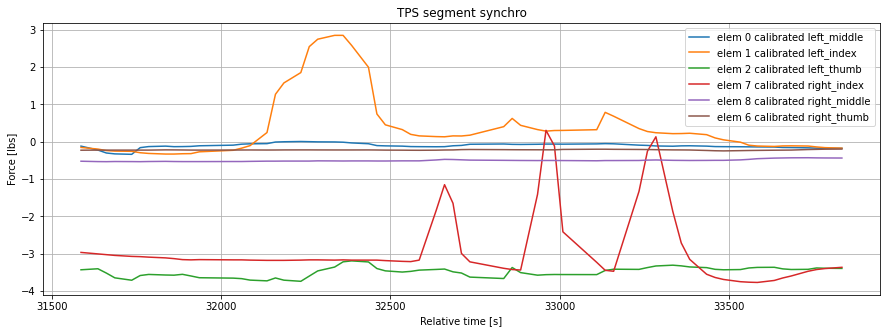

['emg0', 'emg1', 'emg2', 'emg3', 'emg4', 'emg5', 'emg6', 'emg7', 'emg8', 'emg9', 'emg10', 'emg11', 'emg12', 'emg13', 'emg14', 'emg15']
['elem 1 calibrated left_index', 'elem 0 calibrated left_middle', 'elem 2 calibrated left_thumb', 'elem 7 calibrated right_index', 'elem 8 calibrated right_middle', 'elem 6 calibrated right_thumb']
['tweezer_x', 'tweezer_y', 'tweezer_z', 'tweezer_qx', 'tweezer_qy', 'tweezer_qz', 'tweezer_qw', 'scissors_x', 'scissors_y', 'scissors_z', 'scissors_qx', 'scissors_qy', 'scissors_qz', 'scissors_qw', 'needle_holder2_x', 'needle_holder2_y', 'needle_holder2_z', 'needle_holder2_qx', 'needle_holder2_qy', 'needle_holder2_qz', 'needle_holder2_qw', 'absolute_time_new']


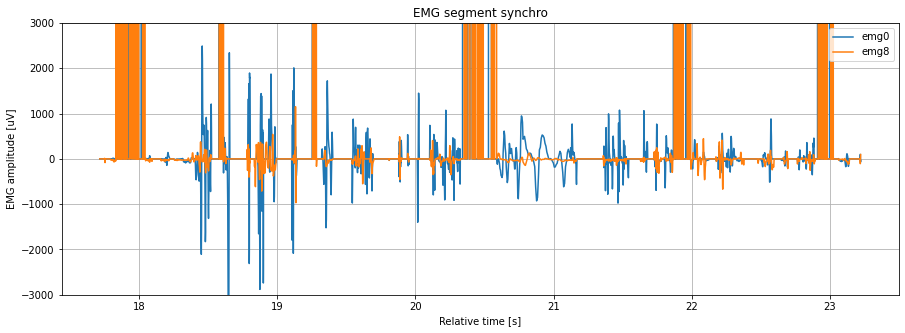

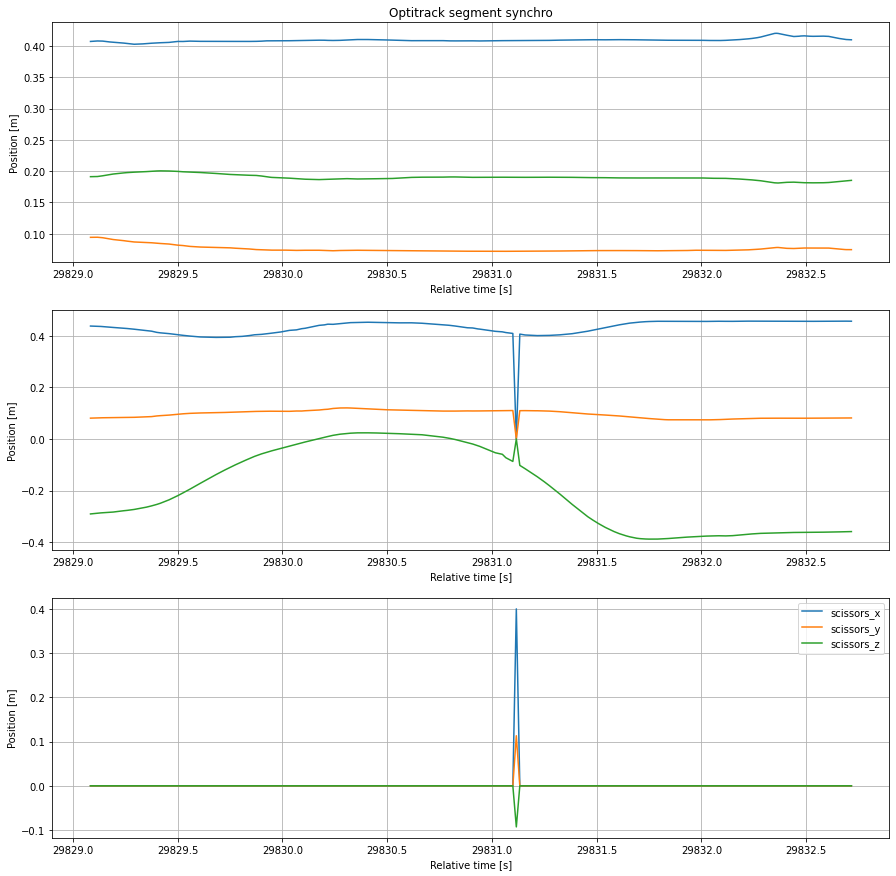

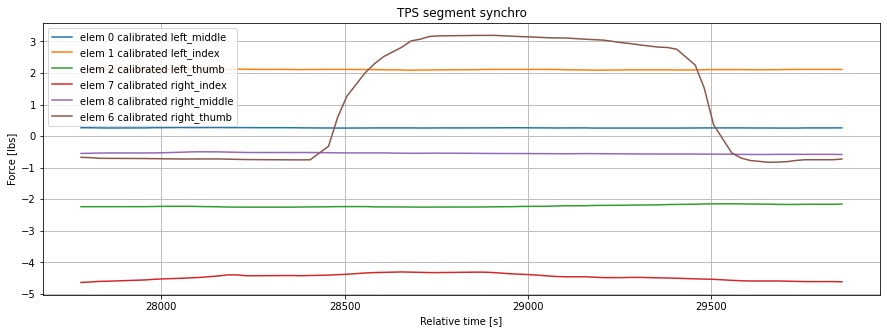

['emg0', 'emg1', 'emg2', 'emg3', 'emg4', 'emg5', 'emg6', 'emg7', 'emg8', 'emg9', 'emg10', 'emg11', 'emg12', 'emg13', 'emg14', 'emg15']
['elem 1 calibrated left_index', 'elem 0 calibrated left_middle', 'elem 2 calibrated left_thumb', 'elem 7 calibrated right_index', 'elem 8 calibrated right_middle', 'elem 6 calibrated right_thumb']
['tweezer_x', 'tweezer_y', 'tweezer_z', 'tweezer_qx', 'tweezer_qy', 'tweezer_qz', 'tweezer_qw', 'scissors_x', 'scissors_y', 'scissors_z', 'scissors_qx', 'scissors_qy', 'scissors_qz', 'scissors_qw', 'needle_holder2_x', 'needle_holder2_y', 'needle_holder2_z', 'needle_holder2_qx', 'needle_holder2_qy', 'needle_holder2_qz', 'needle_holder2_qw', 'absolute_time_new']


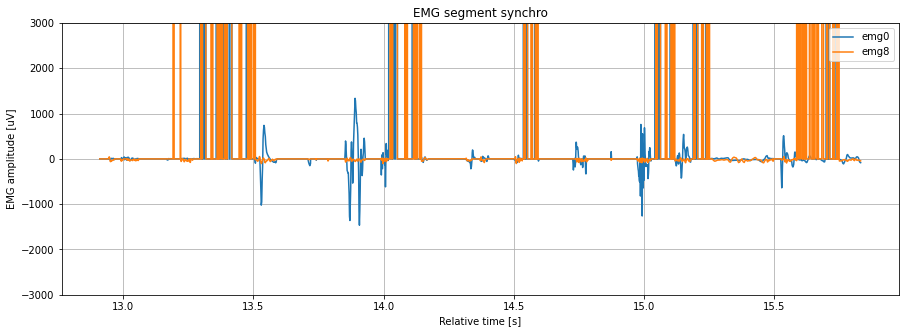

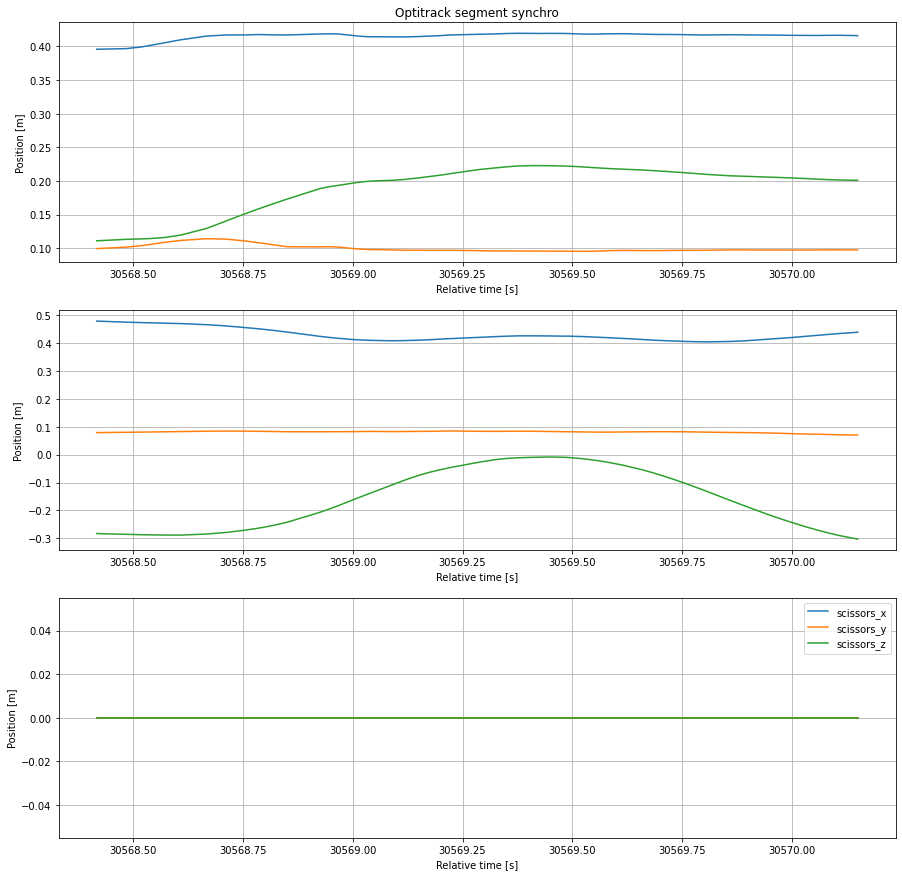

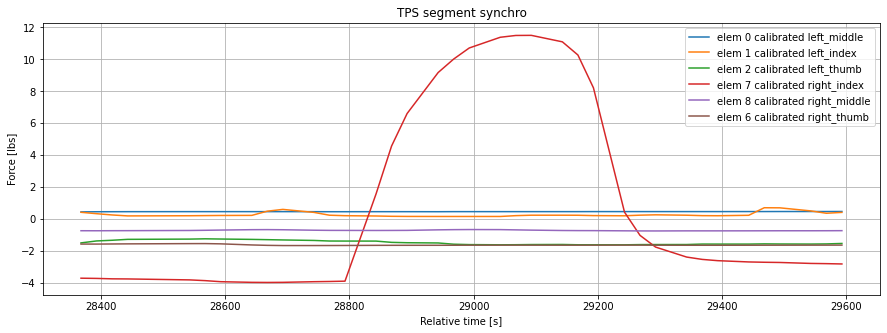

['emg0', 'emg1', 'emg2', 'emg3', 'emg4', 'emg5', 'emg6', 'emg7', 'emg8', 'emg9', 'emg10', 'emg11', 'emg12', 'emg13', 'emg14', 'emg15']
['elem 1 calibrated left_index', 'elem 0 calibrated left_middle', 'elem 2 calibrated left_thumb', 'elem 7 calibrated right_index', 'elem 8 calibrated right_middle', 'elem 6 calibrated right_thumb']
['tweezer_x', 'tweezer_y', 'tweezer_z', 'tweezer_qx', 'tweezer_qy', 'tweezer_qz', 'tweezer_qw', 'scissors_x', 'scissors_y', 'scissors_z', 'scissors_qx', 'scissors_qy', 'scissors_qz', 'scissors_qw', 'needle_holder2_x', 'needle_holder2_y', 'needle_holder2_z', 'needle_holder2_qx', 'needle_holder2_qy', 'needle_holder2_qz', 'needle_holder2_qw', 'absolute_time_new']


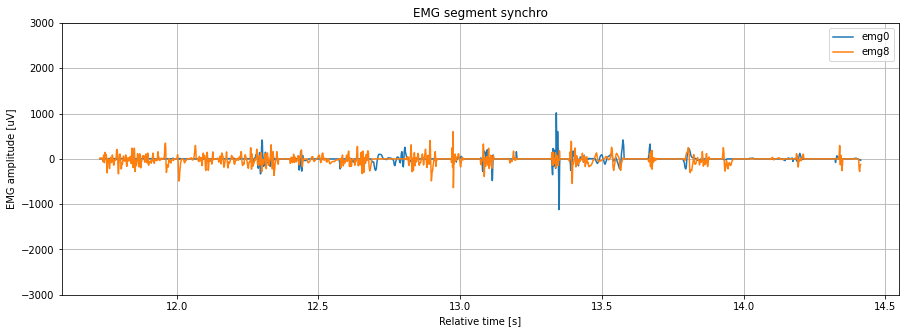

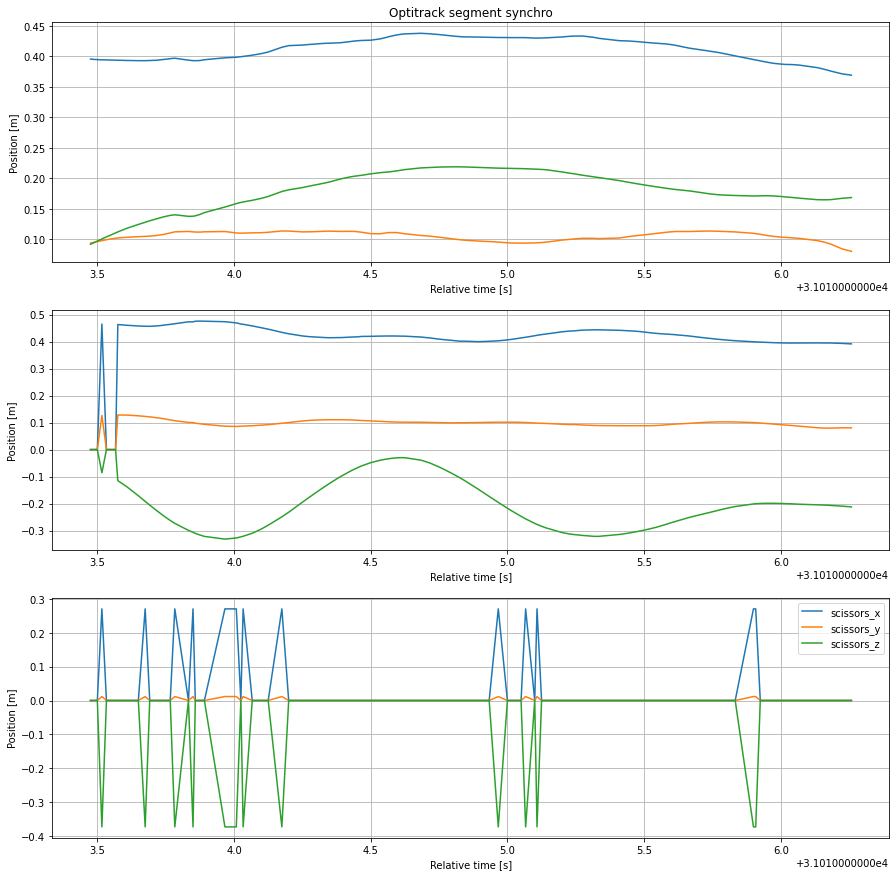

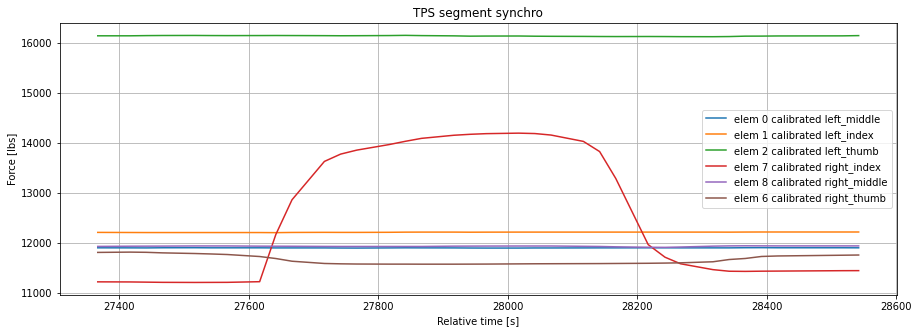

['emg0', 'emg1', 'emg2', 'emg3', 'emg4', 'emg5', 'emg6', 'emg7', 'emg8', 'emg9', 'emg10', 'emg11', 'emg12', 'emg13', 'emg14', 'emg15']
['elem 1 calibrated left_index', 'elem 0 calibrated left_middle', 'elem 2 calibrated left_thumb', 'elem 7 calibrated right_index', 'elem 8 calibrated right_middle', 'elem 6 calibrated right_thumb']
['tweezer_x', 'tweezer_y', 'tweezer_z', 'tweezer_qx', 'tweezer_qy', 'tweezer_qz', 'tweezer_qw', 'scissors_x', 'scissors_y', 'scissors_z', 'scissors_qx', 'scissors_qy', 'scissors_qz', 'scissors_qw', 'needle_holder2_x', 'needle_holder2_y', 'needle_holder2_z', 'needle_holder2_qx', 'needle_holder2_qy', 'needle_holder2_qz', 'needle_holder2_qw', 'absolute_time_new']


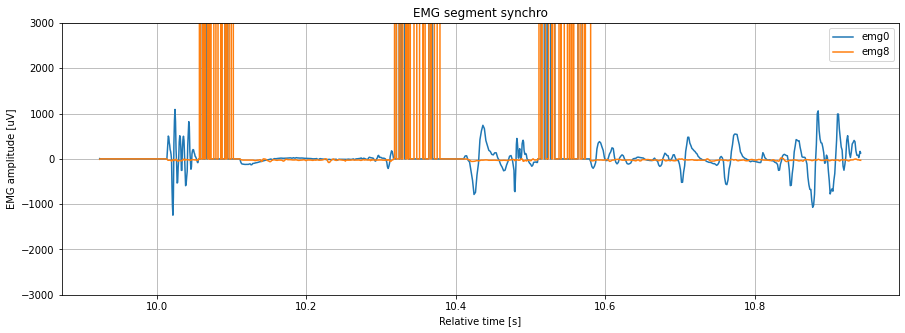

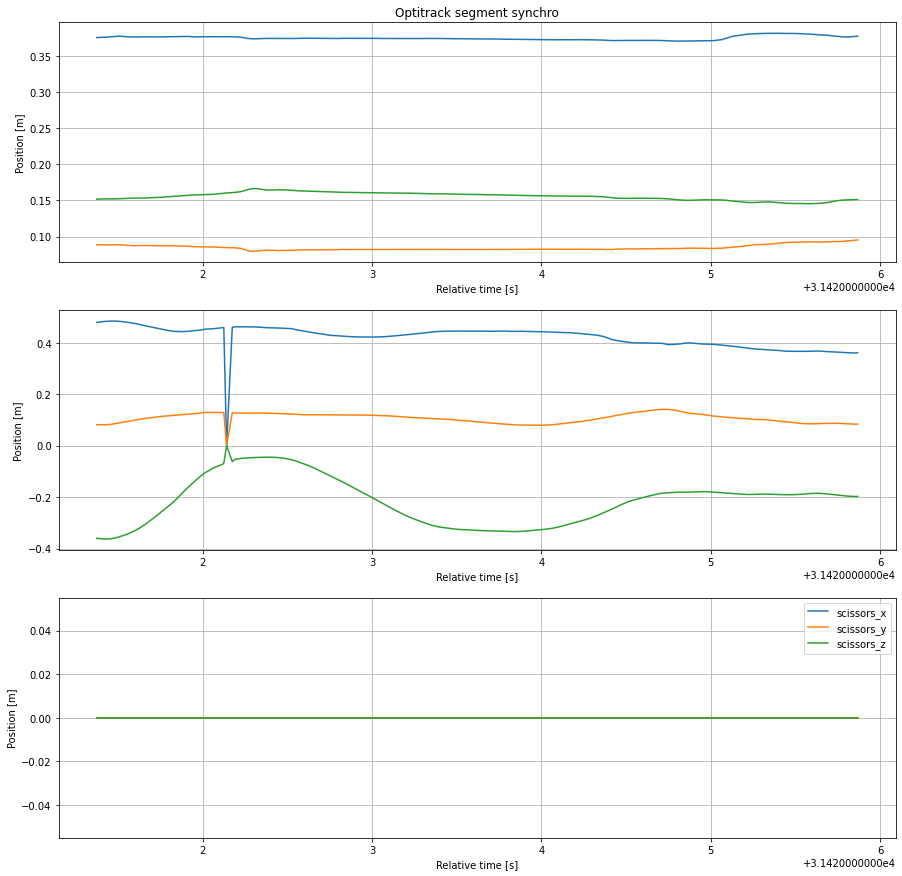

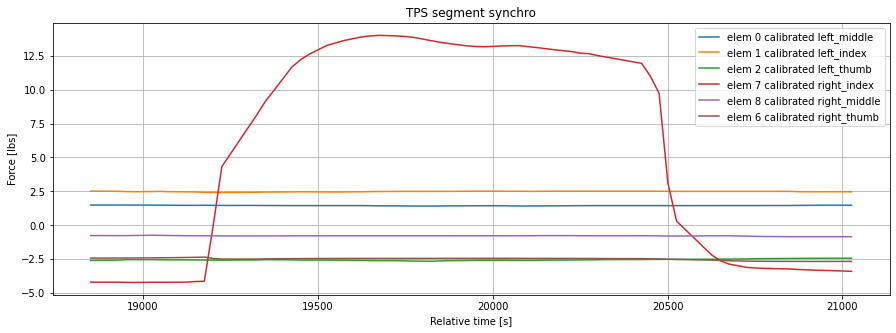

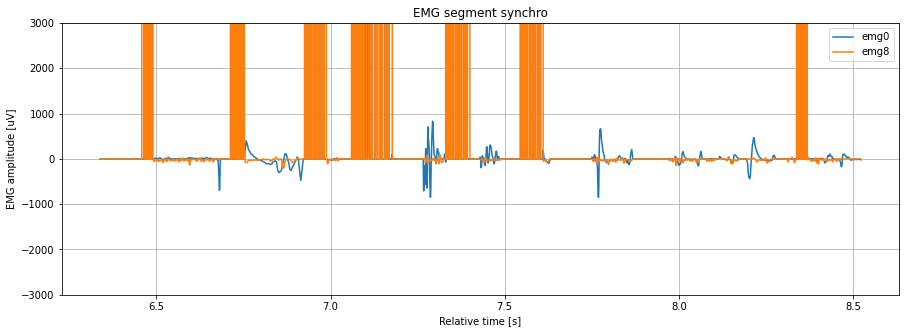

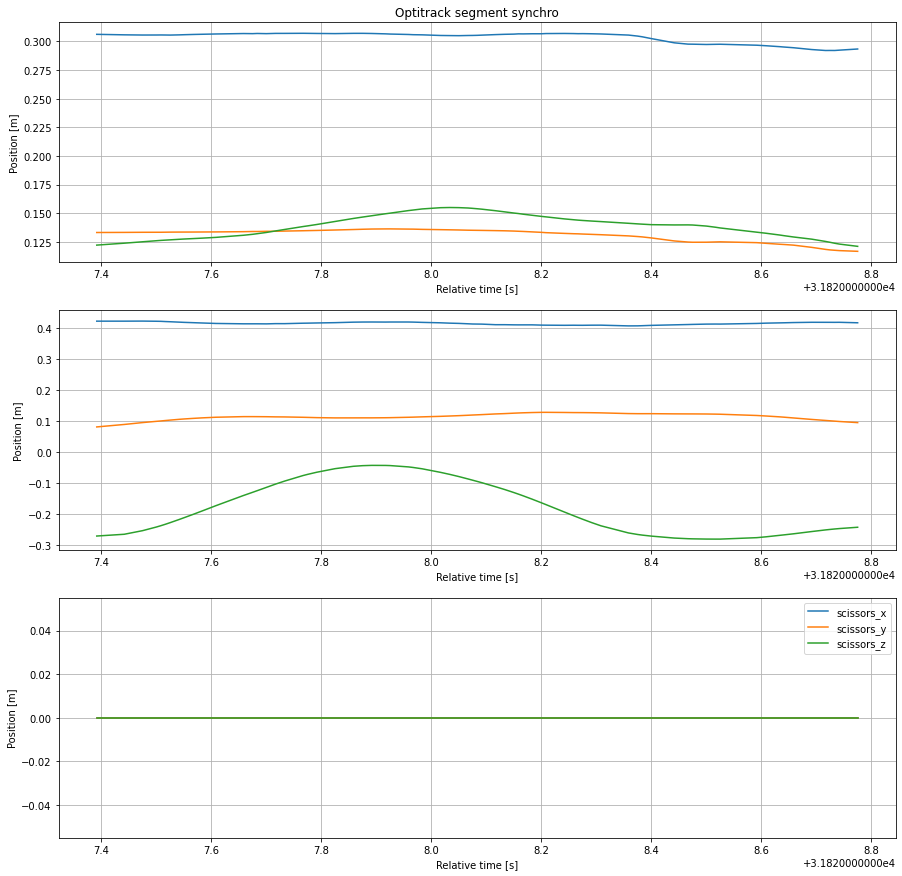

In [66]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)


#recording_session = '70622'
recording_session = '80622'
#recording_session = '90622'
#recording_session = '100622'
#subjects = ['1/1', '1/2', '1/3', '1/4', '1/5']
#subjects = ['2/1', '2/3', '2/4', '2/6','2/7']
#subjects = ['3/2', '3/3', '3/4', '3/6','3/7']
#subjects = ['4/1', '4/3', '4/4', '4/5','4/6']
#subjects = ['5/1', '5/3', '5/4', '5/5','5/6']
#subjects = ['6/1', '6/2', '6/3', '6/4', '6/5']
#subjects = ['7/1', '7/3', '7/4', '7/6','7/7']
#subjects = ['8/1', '8/2', '8/3', '8/4', '8/6']






sensors = ['optitrack', 'emg', 'TPS_calibrated']
#fingers = ['elem 0 calibrated left_middle', 'elem 1 calibrated left_index','elem 2 calibrated left_thumb', 'elem 7 calibrated right_index','elem 8 calibrated right_middle', 'elem 6 calibrated right_thumb']
#emg_channels = ['emg0', 'emg1', 'emg2', 'emg3', 'emg4', 'emg5', 'emg6', 'emg7', 'emg8', 'emg9', 'emg10', 'emg11', 'emg12', 'emg13', 'emg14', 'emg15'  ]  
#tools = ['tweezer_x', 'tweezer_y', 'tweezer_z', 'tweezer_qx', 'tweezer_qy', 'tweezer_qz', 'tweezer_qw', 'scissors_x', 'scissors_y', 'scissors_z', 'scissors_qx', 'scissors_qy', 'scissors_qz', scissors_x
#         tweezer_qx
tools_verif_tweezer = ['tweezer_x', 'tweezer_y', 'tweezer_z']
tools_verif_scissors = ['scissors_x', 'scissors_y', 'scissors_z'] 
#tools_verif_holder = ['needle_holder_x', 'needle_holder_y', 'needle_holder_z'] #subject 
tools_verif_holder = ['needle_holder2_x', 'needle_holder2_y', 'needle_holder2_z'] #subject 2 to 12

path_to_data_folder = '/home/anaelle/git/surgeon_recording/data_exp'                 #lasa computer

data_segments = {}
    
headers = {}

for subject in subjects:
    data_segments[subject] = {}
    data_segments[subject]['tps'] = {}
    data_segments[subject]['emg'] = {}
    data_segments[subject]['optitrack'] = {}


for subject in subjects:
    data_folder = join('..', 'data_exp', recording_session , subject, 'SENSORS', 'SEGMENTATION' )
    
    


    if not os.path.exists(join(path_to_data_folder, recording_session , subject, 'SENSORS', 'SEGMENTATION', 'plot_synchro' )):
            os.makedirs(join(path_to_data_folder, recording_session , subject, 'SENSORS', 'SEGMENTATION', 'plot_synchro'))


    file_emg = join(data_folder, 'segment_nb_2_emg.csv')
    f_emg = open(file_emg)
    reader_emg = csv.DictReader(f_emg)
    headers['emg'] = reader_emg.fieldnames
    channels = headers['emg'][4:]
    print(channels)
            
            
    file_tps = join(data_folder, 'segment_nb_1_TPS_calibrated.csv')
    f_tps = open(file_tps)
    reader_tps = csv.DictReader(f_tps)
    headers['tps'] = reader_tps.fieldnames
    fingers_cal = headers['tps'][15:-1]
    print(fingers_cal)
            
    
    
    file_optitrack = join(data_folder, 'segment_nb_3_optitrack.csv')
    f_opti = open(file_optitrack)
    reader_opti = csv.DictReader(f_opti)
    #get fieldnames from DictReader object and store in list
    headers['optitrack'] = reader_opti.fieldnames
               
    tools = headers['optitrack'][3:]
    print(tools)
    
    

    data_emg = pd.read_csv(file_emg)
    data_tps = pd.read_csv(file_tps)
    data_optitrack = pd.read_csv(file_optitrack)
    data_segments[subject]['tps']['rel_time'] = data_tps[' relative_time']
    data_segments[subject]['emg']['rel_time'] = data_emg['relative_time']
    data_segments[subject]['optitrack']['rel_time'] = data_optitrack['relative_time']
    
    plt.rcParams["figure.figsize"] = (15,5)
    plt.figure()
    for finger in fingers:
        data_segments[subject]['tps'][finger] = data_tps[finger]

        plt.plot(data_segments[subject]['tps']['rel_time'], data_segments[subject]['tps'][finger], label = finger)
        
    plt.xlabel('Relative time [s]')
    plt.ylabel('Force [lbs]')
    plt.title('TPS segment synchro')
    plt.legend()
    plt.grid(True)
    #plt.show()
    plt.savefig(join('..', 'data_exp', recording_session , subject, 'SENSORS', 'SEGMENTATION','plot_synchro', 'segment1_tps.png'))
    plt.show()

    plt.rcParams["figure.figsize"] = (15,5)
    plt.figure()    
    for channel in emg_channels:
        data_segments[subject]['emg'][channel] = data_emg[channel]

    plt.plot(data_segments[subject]['emg']['rel_time'], data_segments[subject]['emg']['emg0'], label = 'emg0')
    plt.plot(data_segments[subject]['emg']['rel_time'], data_segments[subject]['emg']['emg8'], label = 'emg8')
        
    plt.xlabel('Relative time [s]')
    plt.ylabel('EMG amplitude [uV]')
    plt.title('EMG segment synchro')
    plt.ylim(-3000,3000)
    plt.grid(True)
    plt.legend()    
    #plt.show()
    plt.savefig(join('..', 'data_exp', recording_session , subject, 'SENSORS', 'SEGMENTATION','plot_synchro', 'segment2_emg.png'))

        
    for tool in tools:
        data_segments[subject]['optitrack'][tool] = data_optitrack[tool]
        
   

    
    plt.rcParams["figure.figsize"] = (15,15)
    plt.figure()

    plt.subplot(311)
    for tool_verif in tools_verif_tweezer:
        plt.plot(data_segments[subject]['optitrack']['rel_time'], data_segments[subject]['optitrack'][tool_verif], label = tool_verif)
    
    plt.xlabel('Relative time [s]')
    plt.ylabel('Position [m]')
    plt.legend() 
    plt.grid(True)
    plt.title('Optitrack segment synchro')
    plt.subplot(312)
    for tool_verif in tools_verif_holder:
        plt.plot(data_segments[subject]['optitrack']['rel_time'], data_segments[subject]['optitrack'][tool_verif], label = tool_verif)
    
    plt.xlabel('Relative time [s]')
    plt.ylabel('Position [m]')
    plt.legend() 
    plt.grid(True)
    plt.subplot(313)
    for tool_verif in tools_verif_scissors:
        plt.plot(data_segments[subject]['optitrack']['rel_time'], data_segments[subject]['optitrack'][tool_verif], label = tool_verif)
    
    plt.xlabel('Relative time [s]')
    plt.ylabel('Position [m]')
    plt.legend() 
    plt.grid(True)
    #plt.show()
    plt.savefig(join('..', 'data_exp', recording_session , subject, 'SENSORS', 'SEGMENTATION','plot_synchro', 'segment3_optitrack.png'))

        





